## *instats* Workshop, November 18-22, 2024 
### https://instats.org/seminar/computational-network-science-using-pyth2

# COMPUTATIONAL NETWORK SCIENCE USING PYTHON
## Moses Boudourides

# III. ADJACENCY AND CONNECTIVITY

<span style="color:green">
    
### [1. Graph Density](#1)
    
### [2. Node Neighbors](#2)

### [3. Node Degrees](#3)
    
### [4. Scale-Free Networks](#4)

### [5. Adjacency Matrices](#5)

### [6. Subgraphs](#6)

### [7. Paths and Distances](#7)

### [8. Connectedness](#8)

</span>

In [1]:
# The modules (libraries) of Python which are used in this notebook:

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import matplotlib.colors
from collections import Counter, defaultdict
import random, math
import numpy as np
import scipy as sp
import pickle, logging
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from pylab import hist
import powerlaw
# from IPython.core.display import Image, display

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')
# warnings.filterwarnings("ignore", category=DeprecationWarning, message="Importing display from IPython.core.display is deprecated since IPython 7.14")
warnings.filterwarnings("ignore", category=UserWarning, message=".*does not look like a valid URI.*")
warnings.filterwarnings("ignore", module="rdflib")
warnings.filterwarnings("ignore", category=UserWarning, module="rdflib")
logging.basicConfig(level=logging.ERROR)

<a id='1'></a>
## <span style="color:green">1. Graph Density</span>

Let us consider **simple** graphs (meaning unweighted graphs or graphs without multiple/parallel edges). The extensions to weighted or multigraph scenarios can be derived straightforwardly.

The **density $\rho$ of an undirected graph** $G = (V, E)$ is defined as the ratio of the number of edges $|E|$ to the maximum possible number of edges $\binom{|V|}{2} = \frac{1}{2} |V| (|V| - 1)$ in a simple undirected graph. The formula is given by:

$$
\rho = \frac{|E|}{\binom{|V|}{2}} = \frac{2|E|}{|V|(|V| - 1)}.
$$
   
The **density $\rho$ of a directed graph** $G = (V, E)$ is the ratio of the number of edges $|E|$ to the maximum possible number of directed edges $2 \binom{|V|}{2} = |V| (|V| - 1)$ in a directed graph. The formula is:

$$
\rho = \frac{|E|}{2 \binom{|V|}{2}} = \frac{|E|}{|V|(|V| - 1)}.
$$

An undirected graph is **complete** if there is an edge between every pair of distinct nodes. Clearly, an undirected graph is complete if and only if $\rho = 1$ or:


$$
|E| = \binom{|V|}{2} = \frac{1}{2} |V| (|V| - 1).
$$
             
A directed graph is **complete** if there is a directed edge between every pair of distinct nodes in both directions. Clearly, a directed graph is complete if and only if $\rho = 1$ or:


$$
|E| = 2 \binom{|V|}{2} =  |V| (|V| - 1).
$$

In [2]:
G = nx.read_gml("dolphins.gml")
print(f"The Dolphins graph has density = {nx.density(G)}")

with open("AmericanFootballGraph.pickle", "rb") as f:
    G = pickle.load(f)
print(f"The graph of American Football Games has density = {nx.density(G)}")

with open("jazz.pickle", "rb") as f:
    G = pickle.load(f)
print(f"The graph of Jazz Musicians has density = {nx.density(G)}")

with open("LastFMAsiaSN.pickle", "rb") as f:
    G = pickle.load(f)
print(f"The graph of LastFM Asia Friends has density = {nx.density(G)}")

The Dolphins graph has density = 0.08408249603384453
The graph of American Football Games has density = 0.0935163996948894
The graph of Jazz Musicians has density = 0.14059375480695277
The graph of LastFM Asia Friends has density = 0.0009568849118596328


<a id='2'></a>
## <span style="color:green">2. Node Neighbors</span>

#### Undirected Graphs

Let $G = (V,E)$ be an undirected graph, where $V$ denotes the **set of nodes** (or **vertices**) and $E$ the **links** (or **set of edges**) of graph $G$. (Note that the terms nodes and vertices, edges and links, and graph and network are used interchangeably for each pair.)

Every edge is a pair of two nodes: for instance, edge $e ∈ E$, denoted as $e = (u,v)$, is formed by joining the nodes $u, v ∈ V$. $u, v$ are called **end points** of the edge $e$ and edge $e$ is said to be **incident** to its end points.

In general, in a graph $G = (V,E)$ two nodes $u, v ∈ V$ are called **adjacent** to each other if they are the end points of an edge $e \in E$ (apparently, $e = (u,v)$).

In particular, in an undirected graph, if $u ∈ V$ is a node, another node $v ∈ V$ is a **neighbor** of $u$ if there is an edge $(u,v) ∈ E$ (in other words, if $v$ is adjacent to $u$). 

The subset of $V$ composed of all neighbors of node $u$ is denoted as $N(u)$ and it is called (open) **neighborhood** of $u$. 

Notice that node $u$ does **not** belong to its neighborhood (uless one considers the **closed neighborhood** of $u$ defined as $\overline{N(u)} = N(u) \cup \{u\}$).

If $u$ has no neighbors (i.e., $N(u)$ is empty), node $u$ is called **isolated.**

The neighborhood of node 12 is [7, 8, 9]
The isolates of the graph are nodes [2, 13]


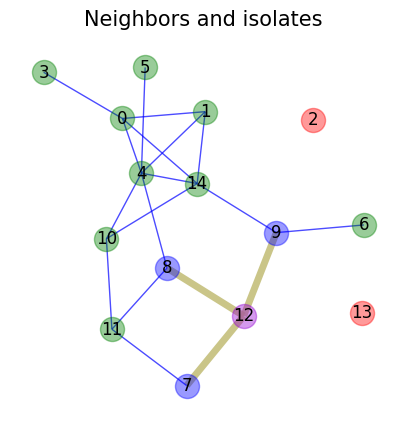

In [3]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        u=random.choice([n for n in G.nodes() if n not in list(nx.isolates(G))])
        if len(list(nx.neighbors(G,u)))>2:
            break

print("The neighborhood of node %i is %s" %(u,list(nx.neighbors(G,u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(nx.neighbors(G,u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if u in e]
Y2=[e for e in G.edges if e not in Y1]

name="Neighbors and isolates"
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

The neighborhood of node Medici is ['Acciaiuoli', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati']
The isolates of the graph are nodes []


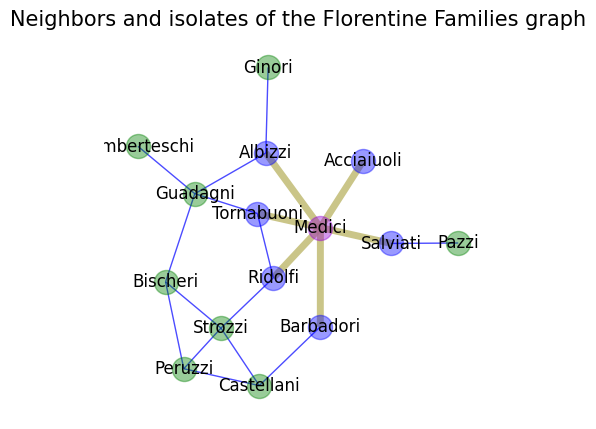

In [4]:
name1 = "Florentine Families"
G = nx.florentine_families_graph()

u=random.choice([n for n in G.nodes()])
u="Medici"
list(nx.neighbors(G,u))
print("The neighborhood of node %s is %s" %(u,list(nx.neighbors(G,u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(nx.neighbors(G,u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if u in e]
Y2=[e for e in G.edges if e not in Y1]

name="Neighbors and isolates of the %s graph" %name1
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

The neighborhood of node DN63 is ['Knit', 'Number1', 'PL', 'SN9', 'Upbang']
The isolates of the graph are nodes []


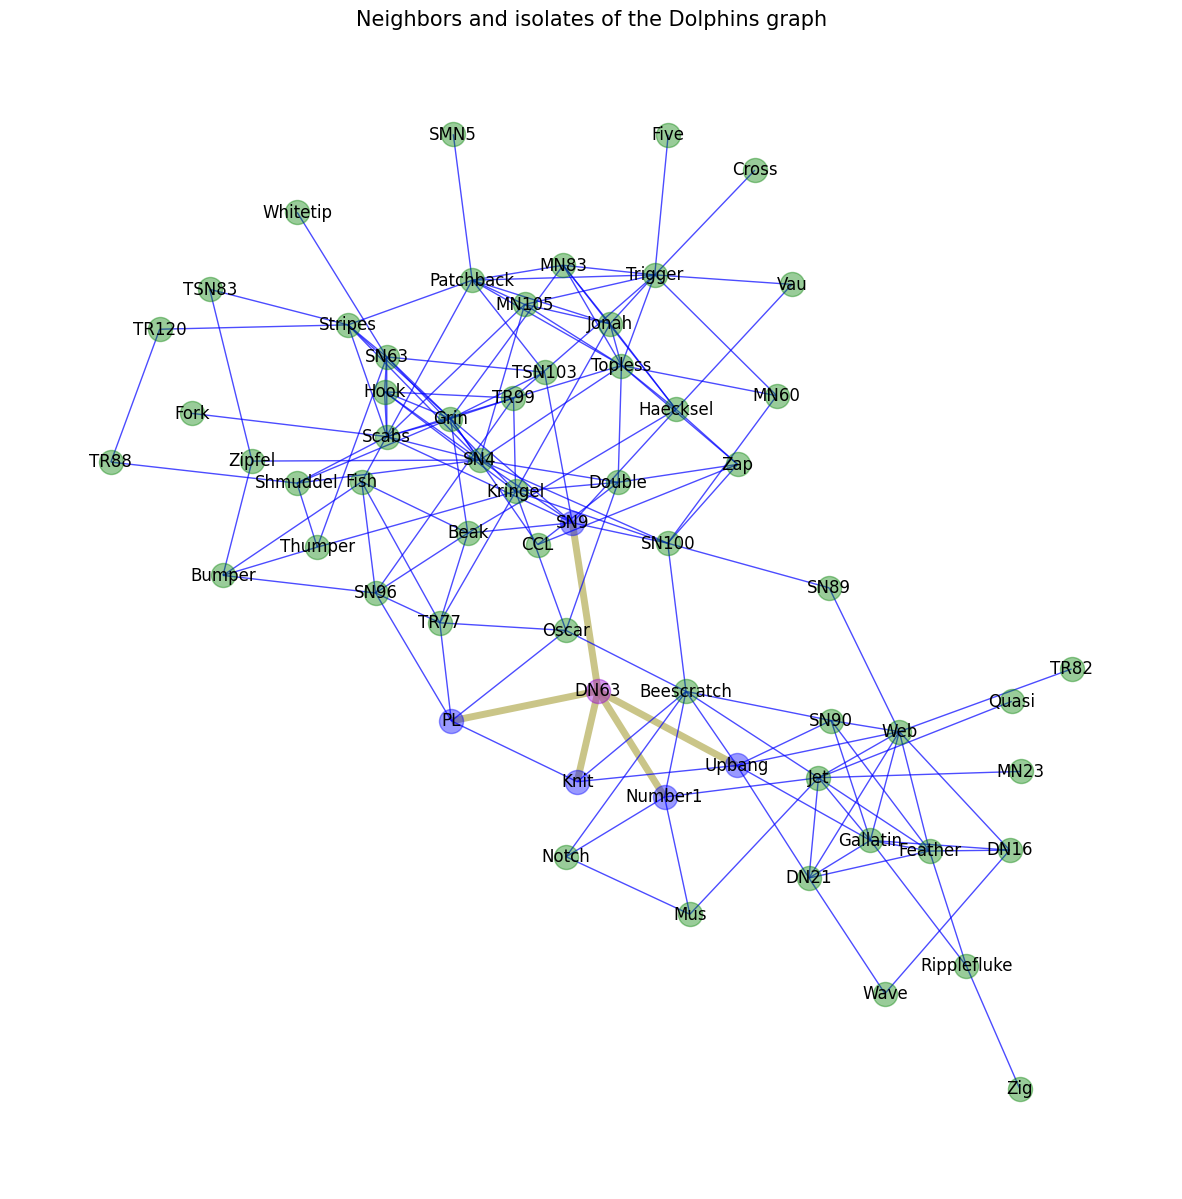

In [5]:
name1 = "Dolphins"
G = nx.read_gml("dolphins.gml")

u=random.choice([n for n in G.nodes()])
list(nx.neighbors(G,u))
print("The neighborhood of node %s is %s" %(u,list(nx.neighbors(G,u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(nx.neighbors(G,u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if u in e]
Y2=[e for e in G.edges if e not in Y1]

name="Neighbors and isolates of the %s graph" %name1
pos=graphviz_layout(G)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

#### Directed Graphs

Let $G = (V,E)$ be a directed graph, where $V$ denotes the **set of nodes** (or **vertices**) and $E$ the **set of edges** (or **links**) of graph $G$. 

If $u ∈ V$ is a node, another node $v ∈ V$ is an **out-neighbor** or **in-neighbor** of $u$ if there is an *ordered* edge $(u,v) ∈ E$ or $(v,u) ∈ E$, respectively. 

The subset of $V$ composed of all out-neighbors or in-neighbors of node $u$ is denoted as $N_{out}(u)$ or $N_{in}(u)$ and it is called (open) **out-neighborhood** or **in-neighborhood**, respectively, of $u$. 

Notice that node $u$ does **not** belong to either its out-neighborhood or in-neighborhood (unless we define the closed in/out-neighborhoods as previously).

If $u$ has no neighbors (i.e., both $N_{out}(u)$ and $N_{in}(u)$ are empty), node $u$ is called **isolated.**

The in-neighborhood of node 8 is [0, 1, 2, 4, 6, 7]
The isolates of the graph are nodes [3, 9]


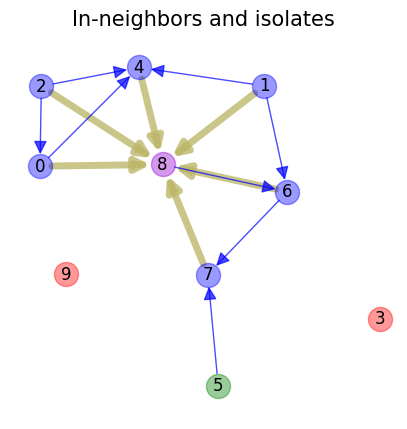

In [6]:
while True:
    G=nx.erdos_renyi_graph(10,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        u=random.choice([n for n in G.nodes() if n not in list(nx.isolates(G))])
        if len(list(G.predecessors(u)))>5:
            break

print("The in-neighborhood of node %i is %s" %(u,list(G.predecessors(u))))
print("The isolates of the graph are nodes %s" %list(nx.isolates(G)))

X1=[u]
X2=list(G.predecessors(u))
X3=list(nx.isolates(G))
X4=[n for n in G.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in G.edges if e[1]==u]
Y2=[e for e in G.edges if e not in Y1]

name="In-neighbors and isolates"
pos=graphviz_layout(G)
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X1,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X2,node_color="b", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X3,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X4, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y2,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

A random subgraph of the USA flights graph including Minneapolis-St Paul International/Wold-Chamberlain Airport
The out-neighborhood of node Minneapolis-St Paul International/Wold-Chamberlain Airport is ['Philadelphia International Airport', 'Birmingham-Shuttlesworth International Airport', 'Blue Grass Airport', 'Greater Rochester International Airport', 'Southwest Florida International Airport', 'Lambert St Louis International Airport']
The isolates of the graph are nodes ['Imperial County Airport', 'Huslia Airport', 'Chico Municipal Airport']


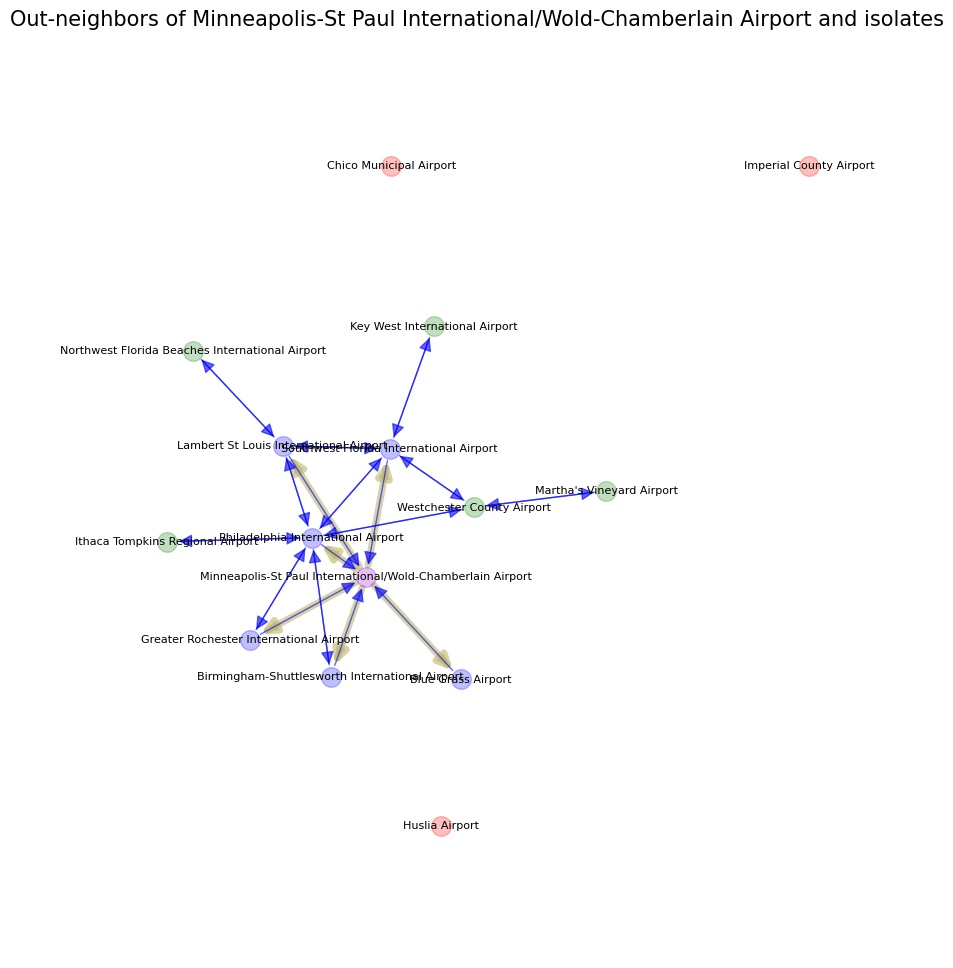

In [7]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
while True:
    Gs=G.subgraph(random.sample(G.nodes(),15))
    if len(list(nx.isolates(Gs)))<5:
        u=random.choice([n for n in Gs.nodes() if n not in list(nx.isolates(Gs))])
        if len(list(Gs.successors(u)))>3:
            break

print(f"A random subgraph of the USA flights graph including {u}")
print(f"The out-neighborhood of node {u} is {list(Gs.successors(u))}")
print(f"The isolates of the graph are nodes {list(nx.isolates(Gs))}")

X1=[u]
X2=list(Gs.successors(u))
X3=list(nx.isolates(Gs))
X4=[n for n in Gs.nodes if n not in X1 and n not in X2 and n not in X3]
Y1=[e for e in Gs.edges if e[0]==u]
Y2=[e for e in Gs.edges if e not in Y1]

name=f"Out-neighbors of {u} and isolates"
pos=graphviz_layout(Gs)
plt.figure(figsize=(12,12));
nodes = nx.draw_networkx_nodes(Gs, pos, nodelist=X1,node_color="darkviolet", alpha=0.25, node_size=200)
nodes = nx.draw_networkx_nodes(Gs, pos, nodelist=X2,node_color="b", alpha=0.25, node_size=200)
nodes = nx.draw_networkx_nodes(Gs, pos, nodelist=X3,node_color="r", alpha=0.25, node_size=200)
nodes = nx.draw_networkx_nodes(Gs, pos, nodelist=X4, node_color="g", alpha=0.25, node_size=200)
nx.draw_networkx_edges(Gs, pos,arrowsize=20,edgelist=Y1,edge_color="darkkhaki",width=5,alpha=0.6)
nx.draw_networkx_edges(Gs, pos,arrowsize=20,edgelist=Y2,edge_color="b", alpha=0.6)
nx.draw_networkx_labels(Gs, pos, font_size=8)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

<a id='3'></a>
## <span style="color:green">3. Node Degrees</span>

#### Undirected Graphs

The **degree** of a node of an undirected graph is equal to the number of neighbors of the node.

A random subgraph of an Erdos-Renyi graph


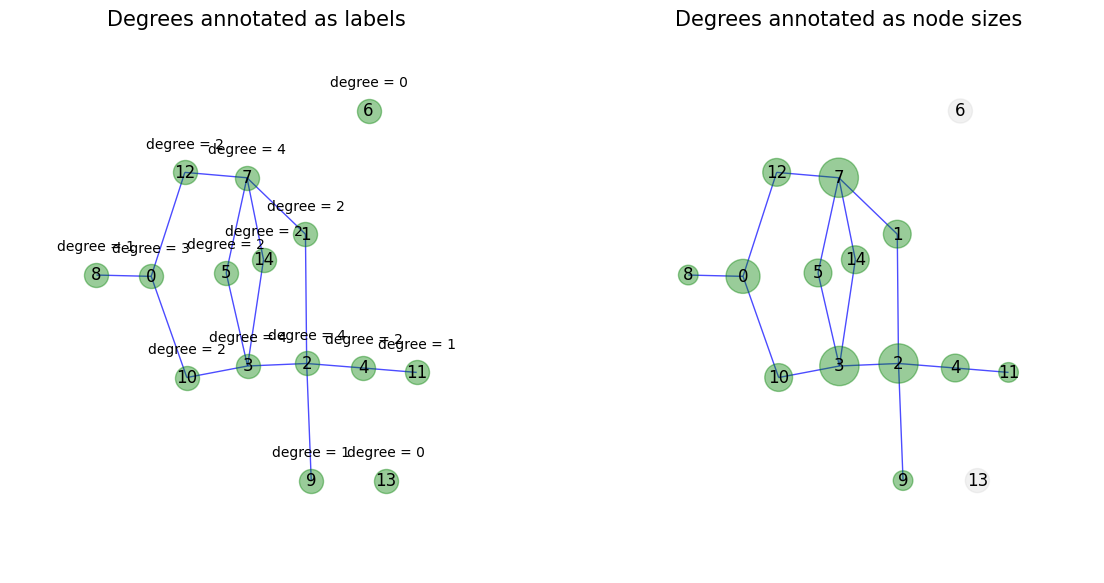

In [8]:
while True:
    G=nx.erdos_renyi_graph(15,0.2)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

print(f"A random subgraph of an Erdos-Renyi graph")

nx.set_node_attributes(G, dict(G.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as node sizes"
        pos=graphviz_layout(G)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(G.degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(G.degree).values()]
        nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

A random subgraph of the dolphins graph


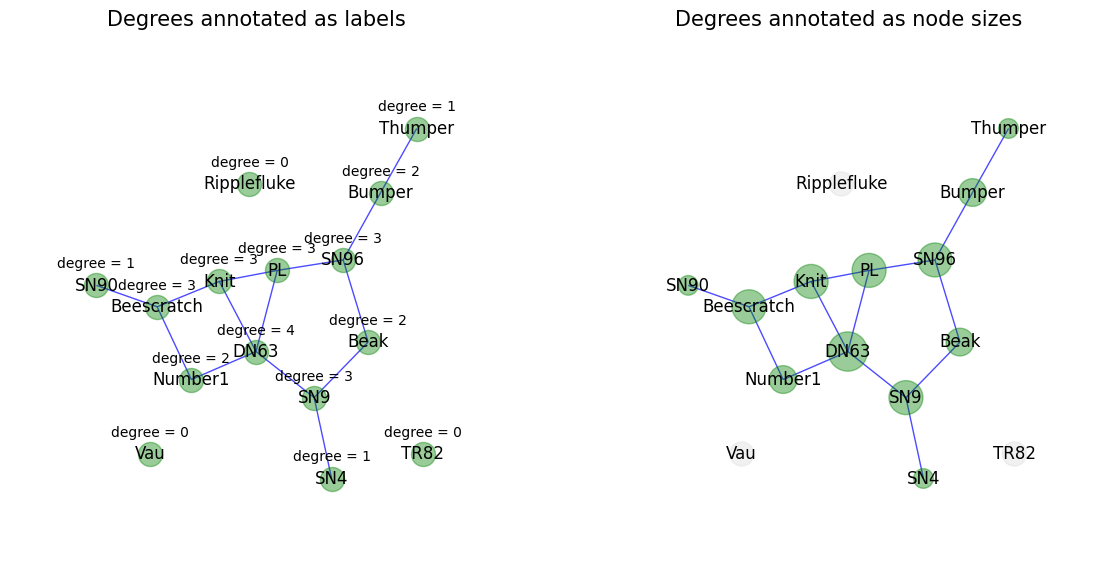

In [9]:
G = nx.read_gml("dolphins.gml")
while True:
    Gs=G.subgraph(random.sample(G.nodes(),15))
    if len(list(nx.isolates(Gs)))>1 and len(list(nx.isolates(Gs)))<5:
        break

print(f"A random subgraph of the dolphins graph")

nx.set_node_attributes(Gs, dict(Gs.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as labels"
        pos=graphviz_layout(Gs)
        nodes = nx.draw_networkx_nodes(Gs, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(Gs, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos)
        node_attrs = nx.get_node_attributes(Gs, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(Gs, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as node sizes"
        pos=graphviz_layout(Gs)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(Gs.degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(Gs.degree).values()]
        nodes = nx.draw_networkx_nodes(Gs, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(Gs, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

A random subgraph of the American Football Games graph


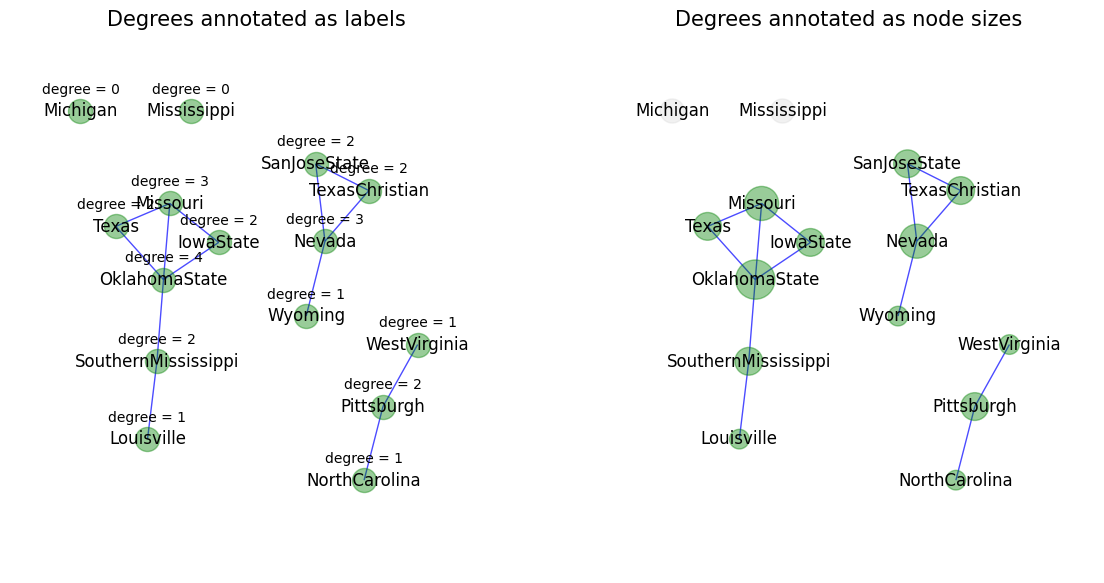

In [10]:
with open("AmericanFootballGraph.pickle", "rb") as f:
    G = pickle.load(f)
while True:
    Gs=G.subgraph(random.sample(G.nodes(),15))
    if len(list(nx.isolates(Gs)))>1 and len(list(nx.isolates(Gs)))<5:
        break

print(f"A random subgraph of the American Football Games graph")

nx.set_node_attributes(Gs, dict(Gs.degree), 'degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as labels"
        pos=graphviz_layout(Gs)
        nodes = nx.draw_networkx_nodes(Gs, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(Gs, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos)
        node_attrs = nx.get_node_attributes(Gs, 'degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(Gs, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Degrees annotated as node sizes"
        pos=graphviz_layout(Gs)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(Gs.degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(Gs.degree).values()]
        nodes = nx.draw_networkx_nodes(Gs, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(Gs, pos, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

#### Directed Graphs

The **out-degree** of a node of an directed graph is equal to the number of out-neighbors of the node.

The **in-degree** of a node of an directed graph is equal to the number of in-neighbors of the node.

The (**total**) **degree** of a node of an directed graph is equal to the sum of its out-degree and in-degree.

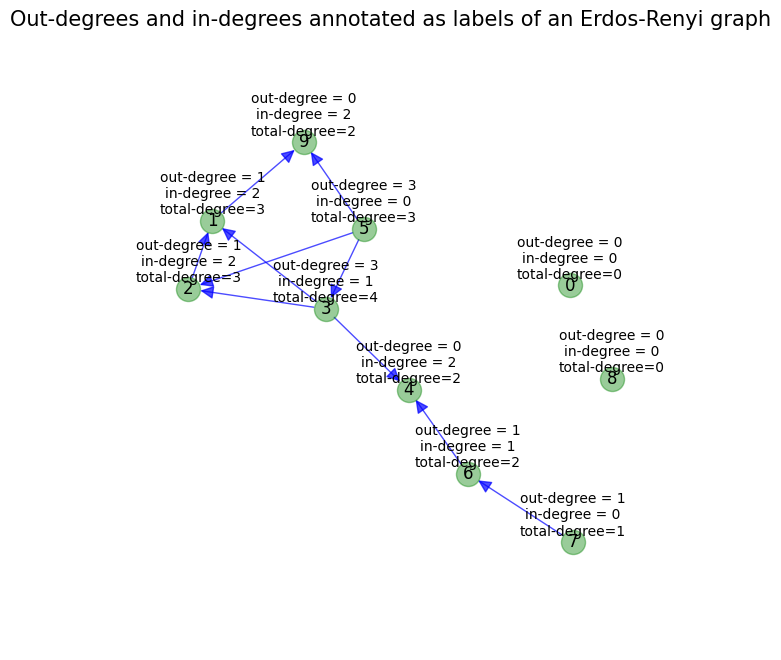

In [11]:
while True:
    G=nx.erdos_renyi_graph(10,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

dd = defaultdict(list)
for d in (dict(G.out_degree), dict(G.in_degree), dict(G.degree)): 
    for key, value in d.items():
        dd[key].append(value)
nx.set_node_attributes(G, dd, 'all degrees')

name="Out-degrees and in-degrees annotated as labels of an Erdos-Renyi graph"
pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
node_attrs = nx.get_node_attributes(G, 'all degrees')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    att="out-degree = %i\nin-degree = %i\ntotal-degree=%i" %(attr[0],attr[1],attr[2])
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 22)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

An Erdos-Renyi graph


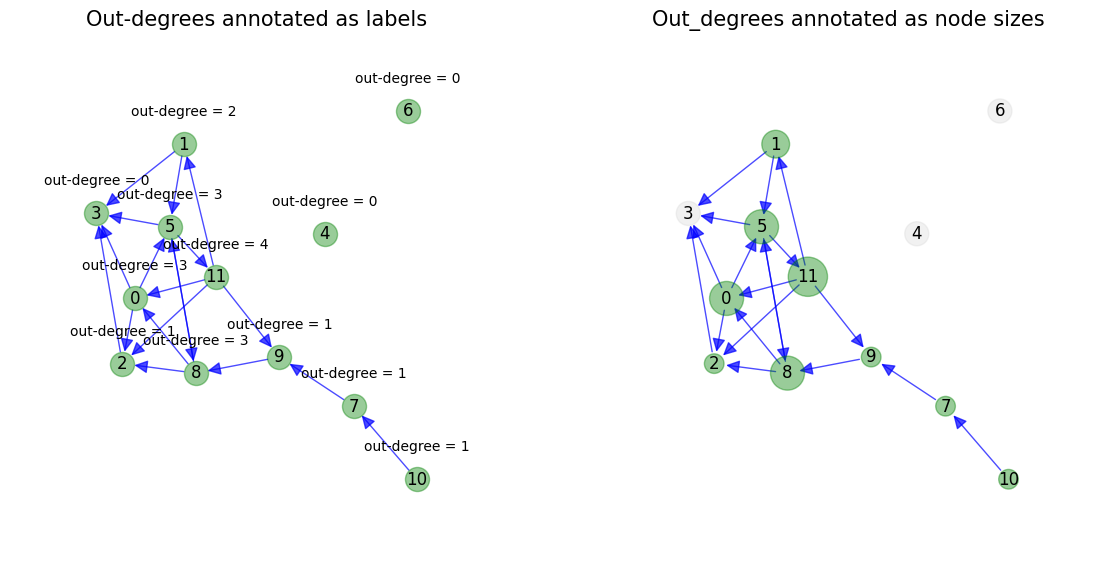

In [12]:
while True:
    G=nx.erdos_renyi_graph(12,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break

print("An Erdos-Renyi graph")

nx.set_node_attributes(G, dict(G.out_degree), 'out degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Out-degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'out degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="out-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Out_degrees annotated as node sizes"
        pos=graphviz_layout(G)
#         nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.out_degree).values()], node_color="g", alpha=0.4)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(G.out_degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(G.out_degree).values()]
        nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

An Erdos-Renyi graph


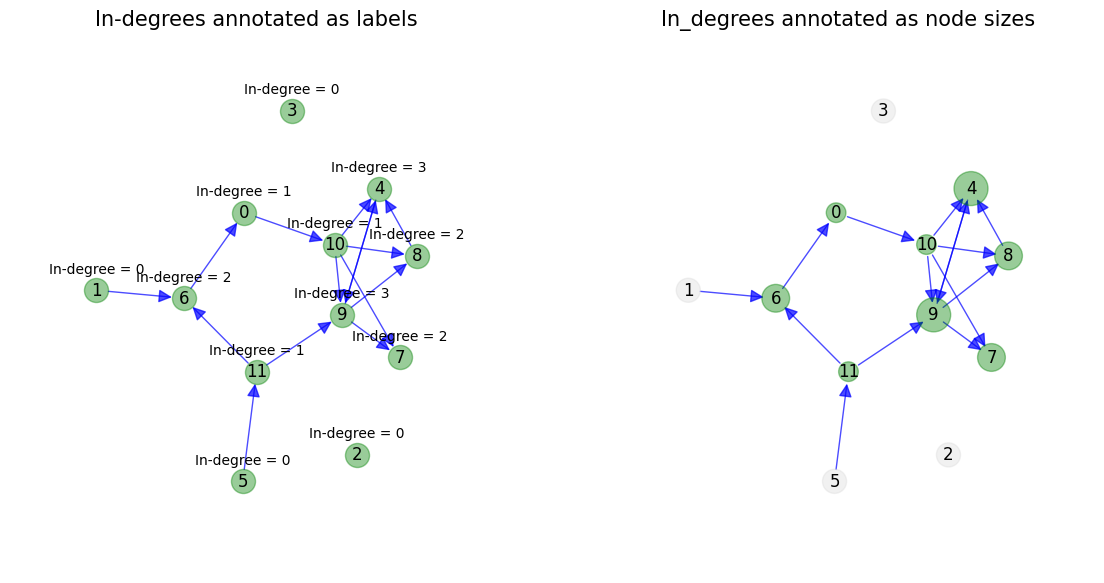

In [13]:
while True:
    G=nx.erdos_renyi_graph(12,0.2,directed=True)
    if len(list(nx.isolates(G)))>1 and len(list(nx.isolates(G)))<5:
        break
        
print("An Erdos-Renyi graph")

nx.set_node_attributes(G, dict(G.in_degree), 'in degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="In-degrees annotated as labels"
        pos=graphviz_layout(G)
        nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        node_attrs = nx.get_node_attributes(G, 'in degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="In-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 15)
        nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="In_degrees annotated as node sizes"
        pos=graphviz_layout(G)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(G.in_degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(G.in_degree).values()]
        nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(G, pos)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

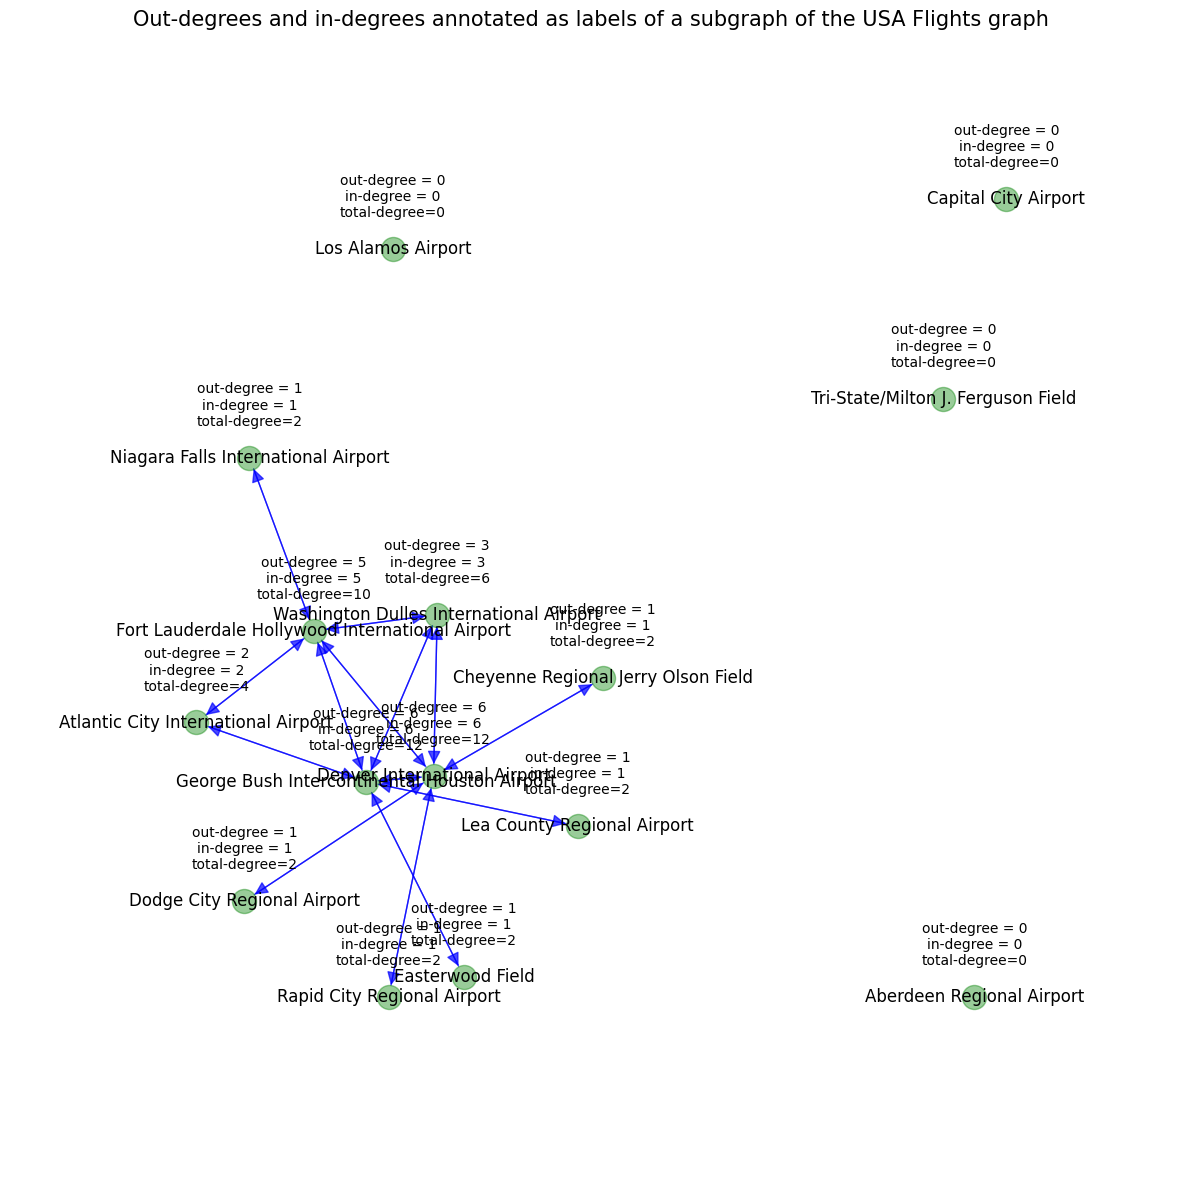

In [14]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
while True:
    Gs=G.subgraph(random.sample(G.nodes(),15))
    if len(list(nx.isolates(Gs)))>1 and len(list(nx.isolates(Gs)))<5:
        break

dd = defaultdict(list)
for d in (dict(Gs.out_degree), dict(Gs.in_degree), dict(Gs.degree)): 
    for key, value in d.items():
        dd[key].append(value)
nx.set_node_attributes(Gs, dd, 'all degrees')

name="Out-degrees and in-degrees annotated as labels of a subgraph of the USA Flights graph"
pos=graphviz_layout(Gs)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gs, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gs, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gs, pos)
node_attrs = nx.get_node_attributes(Gs, 'all degrees')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    att="out-degree = %i\nin-degree = %i\ntotal-degree=%i" %(attr[0],attr[1],attr[2])
    custom_node_attrs[node] = att 
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 22)
nx.draw_networkx_labels(Gs, pos_attrs, labels=custom_node_attrs,font_size=10);
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

A subgraph of the USA Flights graph


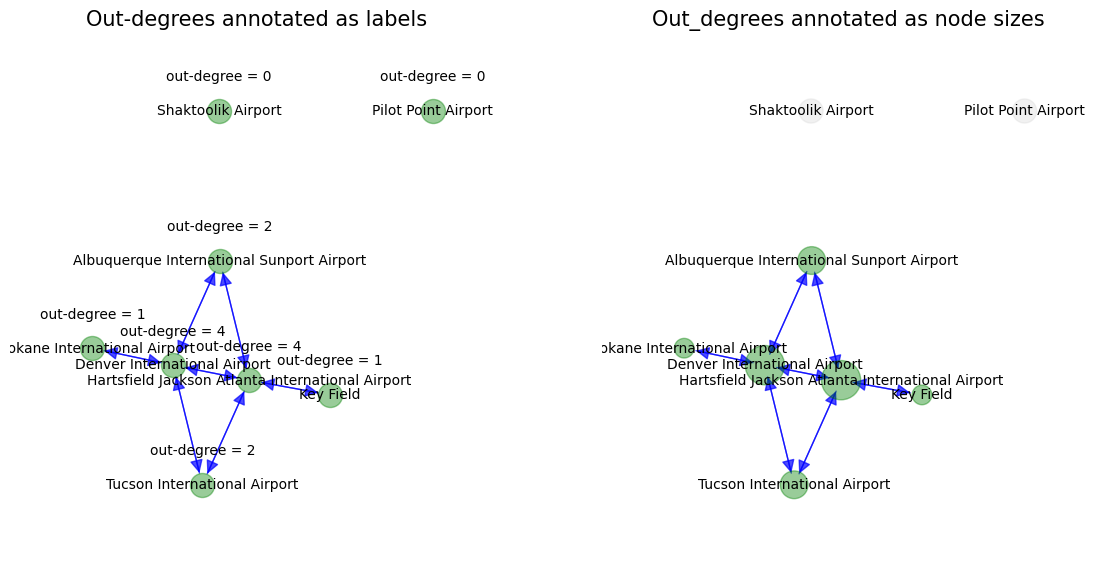

In [15]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
while True:
    Gs=G.subgraph(random.sample(G.nodes(),8))
    if len(list(nx.isolates(Gs)))==2:  
        break

print("A subgraph of the USA Flights graph")

nx.set_node_attributes(Gs, dict(Gs.out_degree), 'out degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="Out-degrees annotated as labels"
        pos=graphviz_layout(Gs)
        nodes = nx.draw_networkx_nodes(Gs, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(Gs, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos, font_size=10)
        node_attrs = nx.get_node_attributes(Gs, 'out degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="out-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(Gs, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="Out_degrees annotated as node sizes"
        pos=graphviz_layout(Gs)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(Gs.out_degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(Gs.out_degree).values()]
        nodes = nx.draw_networkx_nodes(Gs, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(Gs, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos, font_size=10)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

A subgraph of the USA Flights graph


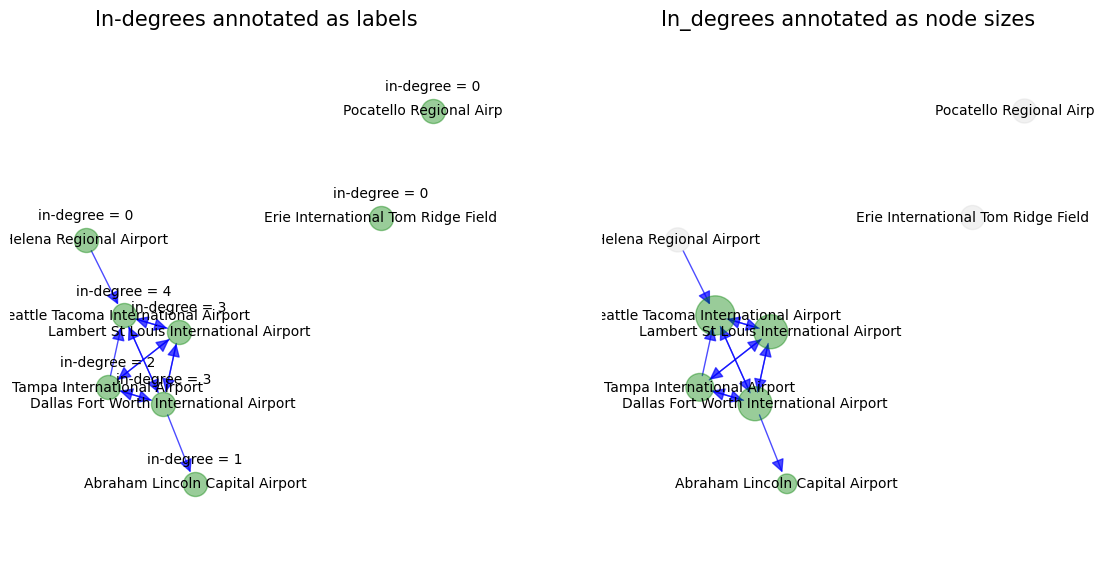

In [16]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
while True:
    Gs=G.subgraph(random.sample(G.nodes(),8))
    if len(list(nx.isolates(Gs)))==2:  
        break

print("A subgraph of the USA Flights graph")

nx.set_node_attributes(Gs, dict(Gs.in_degree), 'in degree')

fig, ax = plt.subplots(1,2,figsize=(14,7), sharex=True)
for i in range(2):
    if i==0:
        plt.subplot(1,2,i+1);
        name="In-degrees annotated as labels"
        pos=graphviz_layout(Gs)
        nodes = nx.draw_networkx_nodes(Gs, pos, node_color="g", alpha=0.4)
        nx.draw_networkx_edges(Gs, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos, font_size=10)
        node_attrs = nx.get_node_attributes(Gs, 'in degree')
        custom_node_attrs = {}
        for node, attr in node_attrs.items():
            att="in-degree = %i" %attr 
            custom_node_attrs[node] = att 
        pos_attrs = {}
        for node, coords in pos.items():
            pos_attrs[node] = (coords[0], coords[1] + 20)
        nx.draw_networkx_labels(Gs, pos_attrs, labels=custom_node_attrs,font_size=10);
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)
    if i==1:
        plt.subplot(1,2,i+1);
        name="In_degrees annotated as node sizes"
        pos=graphviz_layout(Gs)
        node_sizes = [v * 200 if v > 0 else 300 for v in dict(Gs.in_degree).values()]
        node_colors = ["g" if v > 0 else "gainsboro" for v in dict(Gs.in_degree).values()]
        nodes = nx.draw_networkx_nodes(Gs, pos, node_size=node_sizes, node_color=node_colors, alpha=0.4)
        nx.draw_networkx_edges(Gs, pos,arrowsize=20, edge_color="b", alpha=0.7)
        nx.draw_networkx_labels(Gs, pos, font_size=10)
        plt.axis('off');
        plt.title(name,fontsize=15);
        plt.margins(x=0.2, y=0.2)

## <span style="color:green">Degree Histograms</span>

Node degrees:
{0: 3, 1: 2, 2: 1, 3: 2, 4: 5, 5: 3, 6: 4, 7: 3, 8: 3, 9: 2, 10: 5, 11: 3, 12: 3, 13: 3, 14: 4}
Degree sequence:
[1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5]
Frequencies of degree values:
{1: 1, 5: 2, 4: 2, 2: 3, 3: 7}
minimum degree= 1 maximum degree = 5


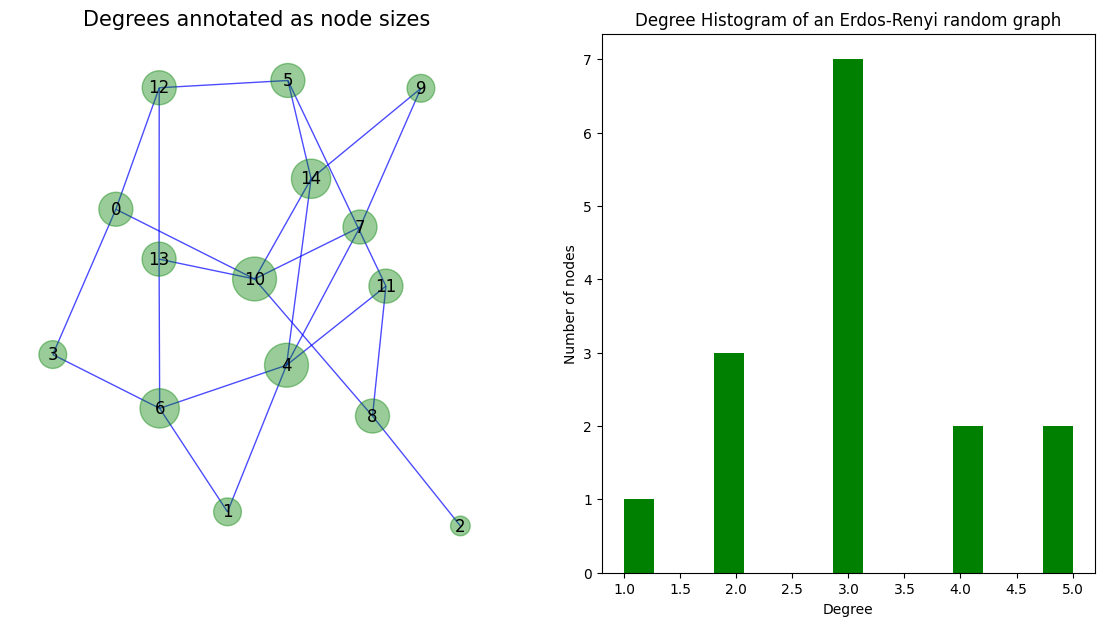

In [17]:
G=nx.erdos_renyi_graph(15,0.2)

ds=dict(G.degree(G.nodes())).values()
print("Node degrees:")
print(dict(G.degree))
print("Degree sequence:")
print(sorted(ds))
print("Frequencies of degree values:")
# print(dict(Counter(ds)))
print(dict(sorted(dict(Counter(ds)).items(), key=lambda item: item[1])))
print("minimum degree=",min(ds),"maximum degree =",max(ds))

plt.figure(figsize=(14,7))
plt.subplot(121)
name="Degrees annotated as node sizes"
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_size=[v*200 for v in dict(G.degree).values()], node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);
# plt.margins(x=0.2, y=0.2)

plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=len(ds),color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi random graph');

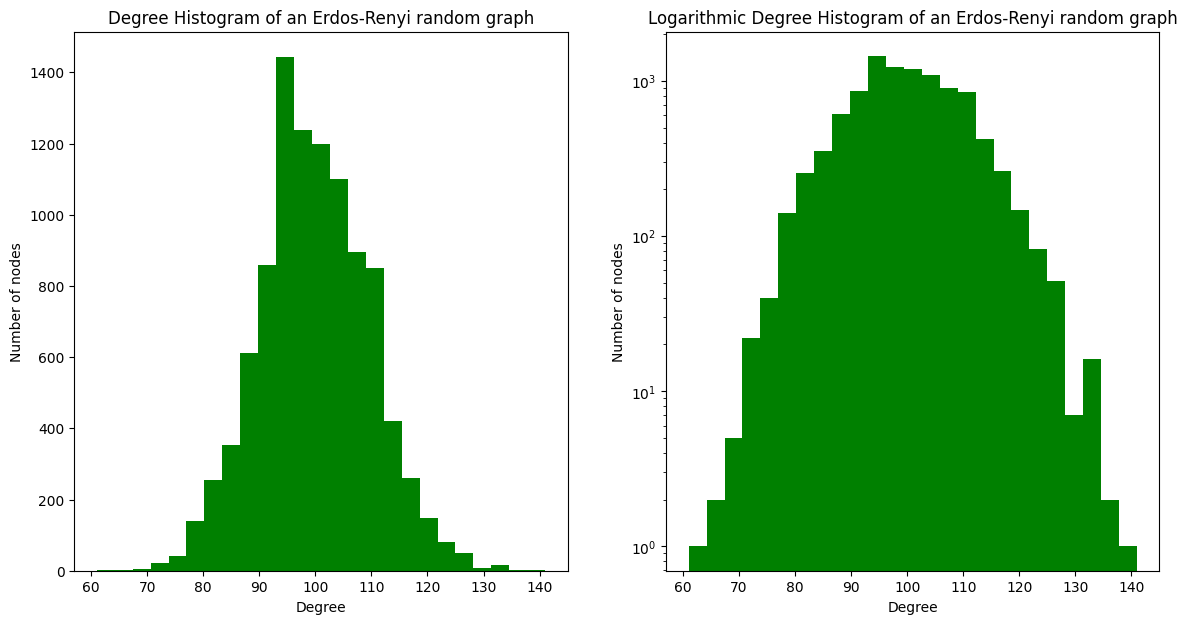

In [18]:
G = nx.erdos_renyi_graph(10000,0.01)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of an Erdos-Renyi random graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Logarithmic Degree Histogram of an Erdos-Renyi random graph');

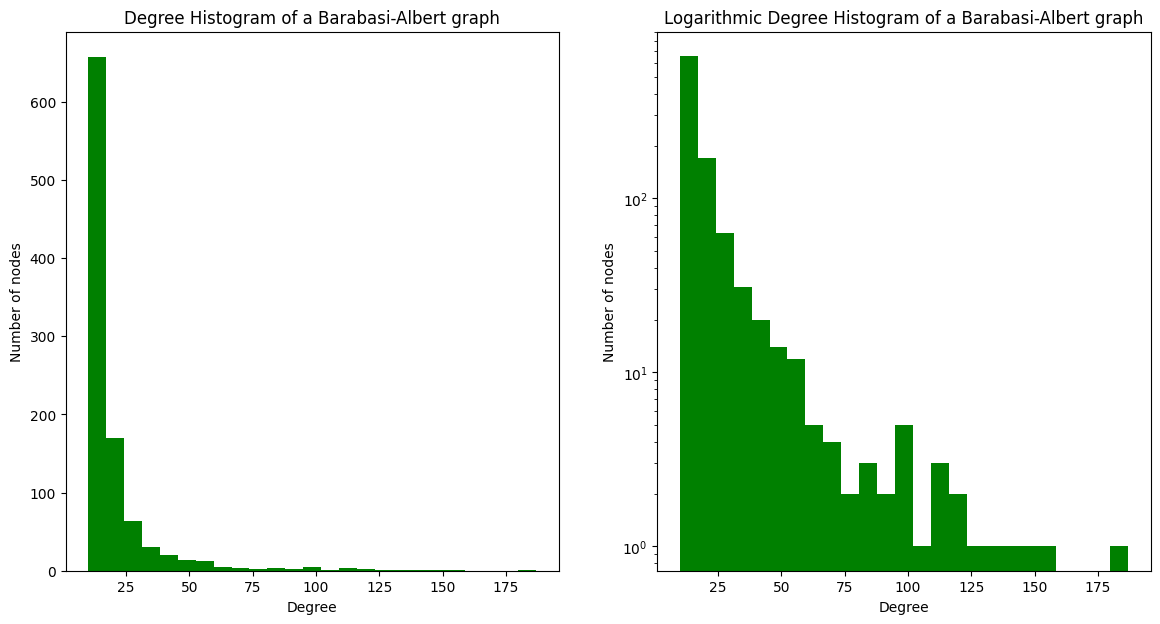

In [19]:
G = nx.barabasi_albert_graph(1000,10)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of a Barabasi-Albert graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Logarithmic Degree Histogram of a Barabasi-Albert graph');

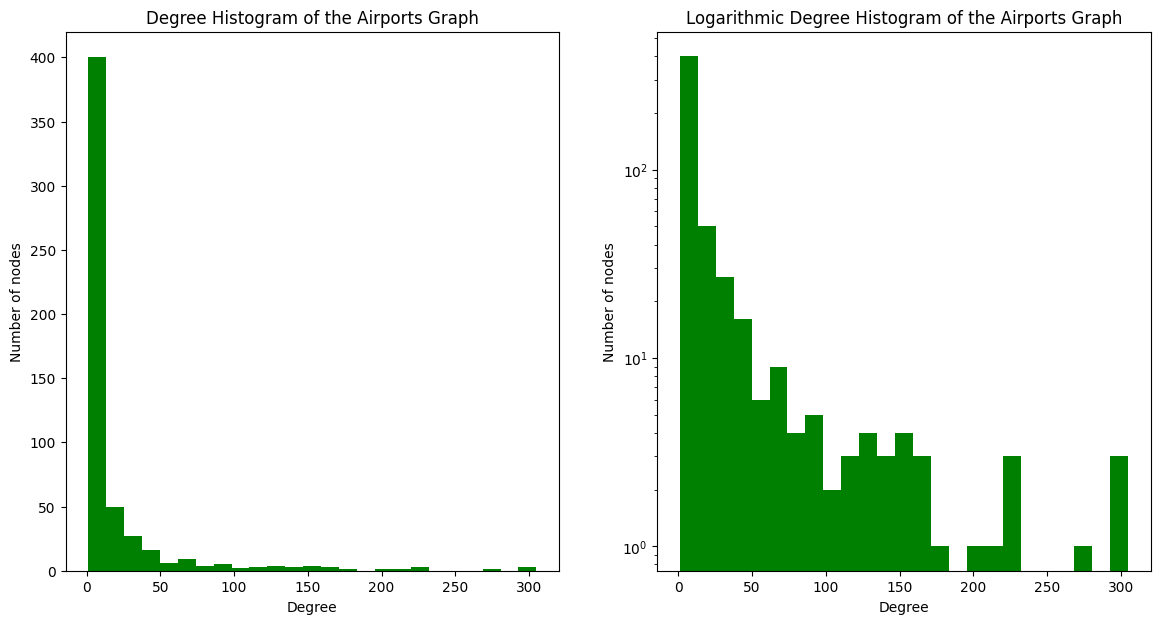

In [20]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)

ds=dict(G.degree(G.nodes())).values()
bins=25

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g'); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Degree Histogram of the Airports Graph');
plt.subplot(122)
plt.xlabel("Degree");
hist(ds,bins=bins,color='g',log=True); 
# histtype='step',
plt.ylabel("Number of nodes");
plt.title('Logarithmic Degree Histogram of the Airports Graph');

<a id='4'></a>
## <span style="color:green">4. Scale-Free Networks</span>

**Scale-free networks** are networks whose degree distribution follows a power-law pattern, meaning that a small number of nodes (often called hubs) have a high degree (i.e., many links incident to them), while most other nodes have relatively few links incident to them. Formally, in a scale-free network, the probability $P(k)$ that a randomly chosen node has degree $k$ is proportional to $k^{-\gamma}$, where $\gamma$ is a positive constant typically between 2 and 3,

$$
P(k) \propto k^{-\gamma}.
$$

This distribution does not decay exponentially, as in random networks, but instead has a "long tail," allowing for nodes with extremely high degrees. Furthermore, this distribution is typically observed in real-world scale-free networks like the Internet, social networks, and biological networks.

Key Characteristics:
- **Hubs**: A few nodes with very high connectivity dominate the structure of the network, making it robust against random failures but potentially vulnerable to targeted attacks.
- **Self-similarity**: Scale-free networks maintain the same structural properties regardless of the network's size.
- **Preferential Attachment**: New nodes are more likely to connect to nodes that already have a high degree, a process that leads to the emergence of hubs over time.

These properties of scale-free networks make them distinct from other types of networks, such as **random graphs**, which typically have a **Poisson degree distribution**. The concept was introduced and popularized by Barabási and Albert in their 1999 model, which demonstrates how scale-free networks can evolve in real systems through mechanisms like preferential attachment.

In [21]:
def calculate_gamma_and_check_scale_free(graph):
    # Get degree sequence of the graph
    degrees = [degree for node, degree in graph.degree() if degree > 0]
    
    # Fit the degree distribution to a power law
    fit = powerlaw.Fit(degrees)
    gamma = fit.power_law.alpha
    
    # Calculate the likelihood ratio and p-value for comparing power law vs. other distributions
    R, p = fit.distribution_compare('power_law', 'exponential')
    
    # Determine if the graph is scale-free
    # Typically, a power-law distribution is preferred if R > 0 and p < 0.05
    is_scale_free = R > 0 and p < 0.05
    
    # Print results
    print(f"Estimated gamma: {gamma:.2f}")
    print(f"Likelihood ratio (R): {R:.2f}, p-value: {p:.2f}")
    print("Is the graph scale-free?", "Yes" if is_scale_free else "No")
    
    return gamma, is_scale_free

In [22]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
calculate_gamma_and_check_scale_free(G)

Calculating best minimal value for power law fit
Estimated gamma: 2.01
Likelihood ratio (R): 7.23, p-value: 0.30
Is the graph scale-free? No


(np.float64(2.0083336177541153), np.False_)

In [23]:
with open("AmericanFootballGraph.pickle", "rb") as f:
    G = pickle.load(f)
calculate_gamma_and_check_scale_free(G)

Calculating best minimal value for power law fit
Estimated gamma: 75.70
Likelihood ratio (R): 2.37, p-value: 0.00
Is the graph scale-free? Yes


(np.float64(75.70287478354344), np.True_)

<a id='5'></a>
## <span style="color:green">5. Adjacency Matrices</span>

Let $G=(V,E)$ be a graph with $n$ vertices and set of vertices $V = \{1, 2, \ldots, n\}$.
Then the **adjacency matrix** of this graph is a $nxn$ matrix $A = \{A_{ij}\}$ such that $A_{ij} = 1$, whenever $(i,j) ∈ E$, while otherwise $A_{ij} = 0$.

Notice that all **diagonal terms** of the adjacency matrix are $0$, unless the graph possesses **self-loops** (which are edges of the form $e = (u,u)$, i.e., possessing the same end point).

If $G$ is undirected, $A$ is a symmetrical matrix. 

If $G$ is directed, $A$ is usually a non-symmetrical matrix, but it can be symmetrical (when all edges are *reciprocated*).

If $G$ is **weighted**, the value of $A_{ij}$ are the the weight of edge $(i,j)$.

*Relationships between adjacency matrix and degrees*:

If $G = (V,E)$ is undirected graph with $n$ nodes, i.e., with $V = \{1, 2, \ldots, n\}$ and $\{A_{ij}\}$ the adjacency matrix of this graph, for node $i ∈ V$, the degree of $i$, denoted as $k_i$, is given by:
$$
k_i = |N(i)| = \sum_{j = 1}^{n} A_{ij}
$$

According to the **handshaking lemma**, the sum of degrees of an undirected graph equals to twice the number of all edges:
$$
\sum_{i = 1}^{n} k_i = \sum_{i = 1}^{n} \sum_{j = 1}^{n} A_{ij} = 2|E|
$$

If $G = (V,E)$ is directed graph with $n$ nodes, i.e., with $V = \{1, 2, \ldots, n\}$ and $\{A_{ij}\}$ the adjacency matrix of this graph, for node $i ∈ V$, the out-degree of $i$ is denoted as $k_i^{out}$, the in-degree of $i$ is denoted as $k_i^{in}$ and the degree of $i$ is denoted as $k_i$:
$$k_{i}^{out} = \sum_{j = 1}^n A_{ji}$$
$$k_{i}^{in} = \sum_{j = 1}^n A_{ij}$$
$$k_i = k_{i}^{out} + k_{i}^{in}$$

#### Undirected Graphs

[[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0]]


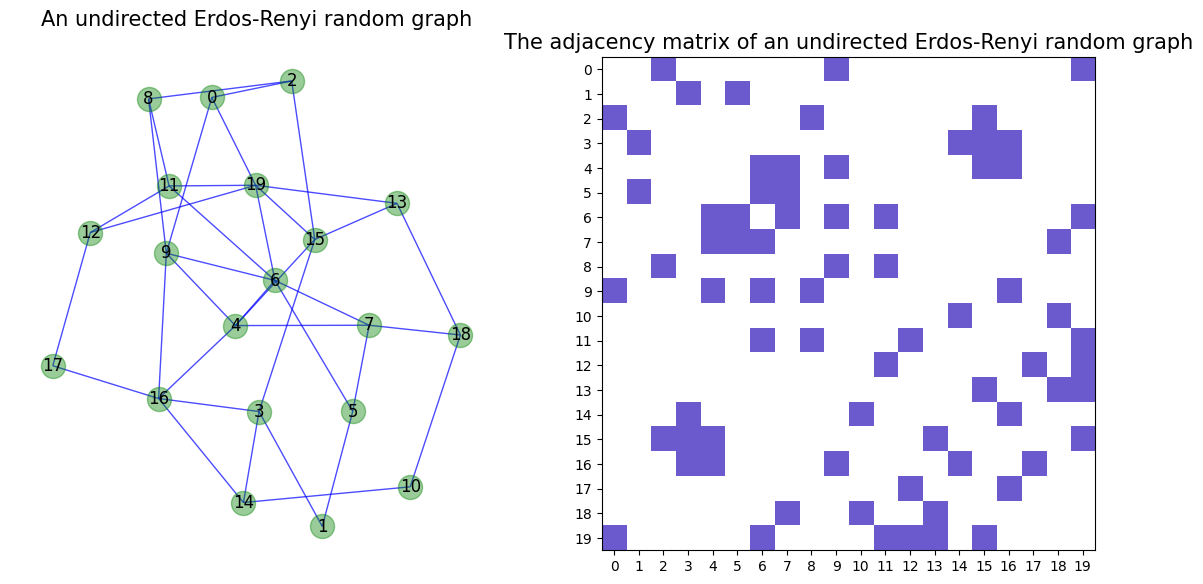

In [24]:
G = nx.erdos_renyi_graph(20,0.2)
name = "undirected Erdos-Renyi random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'slateblue']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


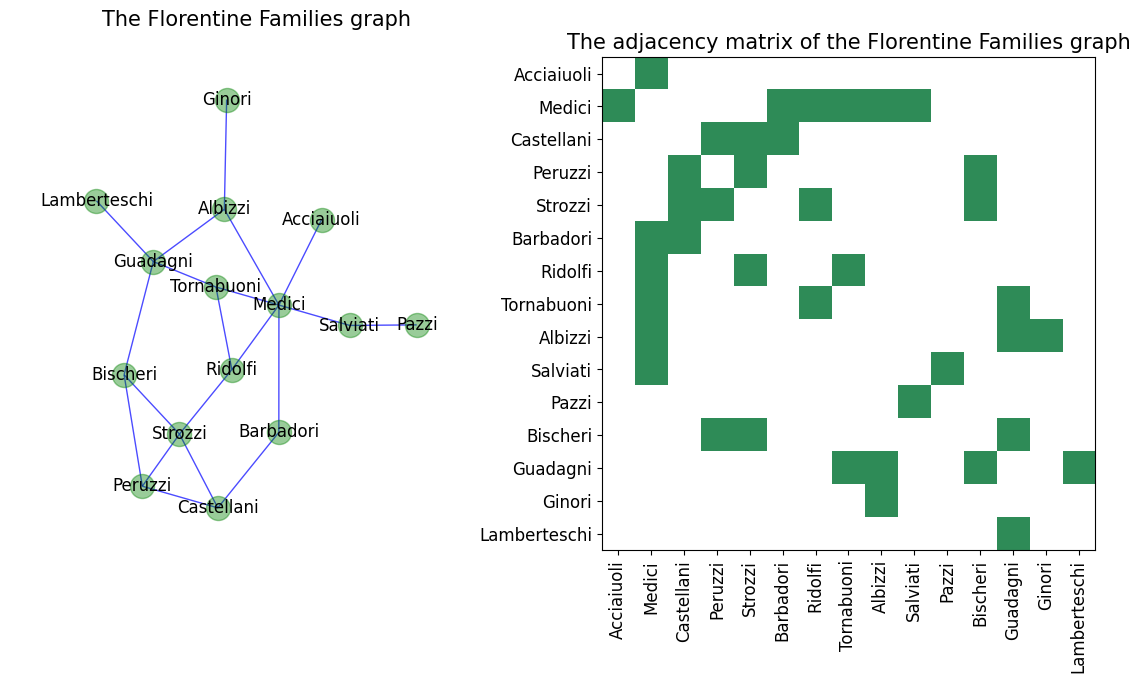

In [25]:
G = nx.florentine_families_graph()
name = "Florentine Families graph"

A = nx.adjacency_matrix(G)
print(A.todense())

adjacency_matrix = nx.to_numpy_array(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=12, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=12);
plt.title("The adjacency matrix of the "+name,fontsize=15);

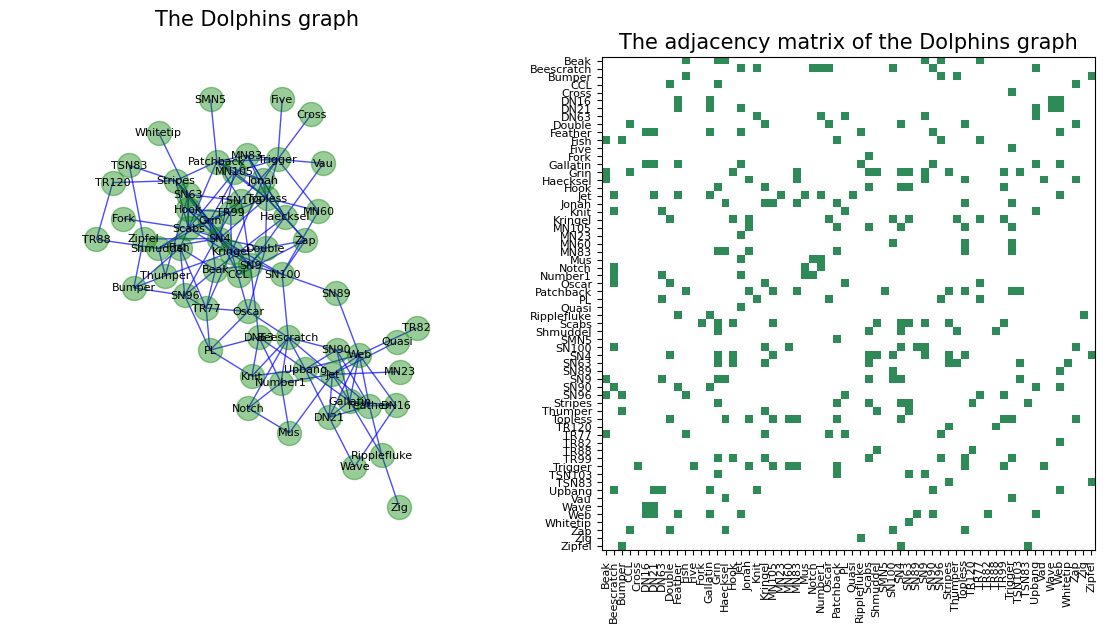

In [26]:
G = nx.read_gml("dolphins.gml")
name = "Dolphins graph"

A = nx.adjacency_matrix(G)

adjacency_matrix = nx.to_numpy_array(G)
x = list(G.nodes())
y = list(G.nodes())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos,font_size=8)
plt.axis('off');
plt.title("The "+name,fontsize=15);
plt.margins(x=0.2, y=0.1)
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'seagreen']),interpolation="none")
plt.xticks(range(len(x)), x, fontsize=8, rotation='vertical');
plt.yticks(range(len(y)), y, fontsize=8);
plt.title("The adjacency matrix of the "+name,fontsize=15);

#### Directed Graphs

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


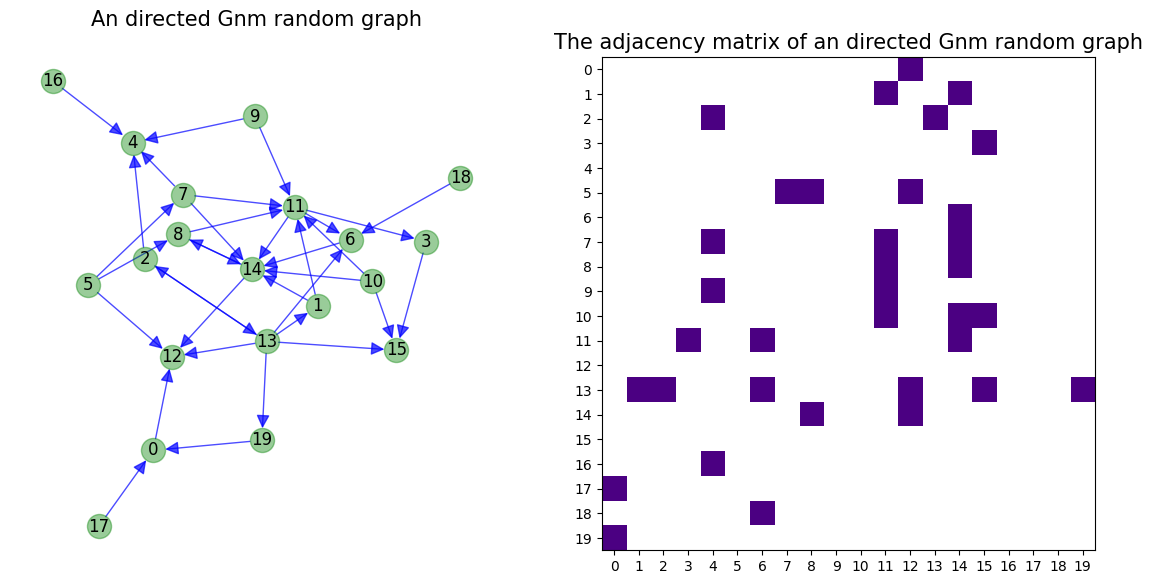

In [27]:
G = nx.gnm_random_graph(n=20, m=35, directed=True)
name = "directed Gnm random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'indigo']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

#### A directed graph with a symmetric adjacency matrix (is always a directed graph with all edges being reciprocated)

[[0 0 0 0 1 1 1]
 [0 0 1 1 0 0 1]
 [0 1 0 1 1 1 1]
 [0 1 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 1 1 0 0 0 0]]


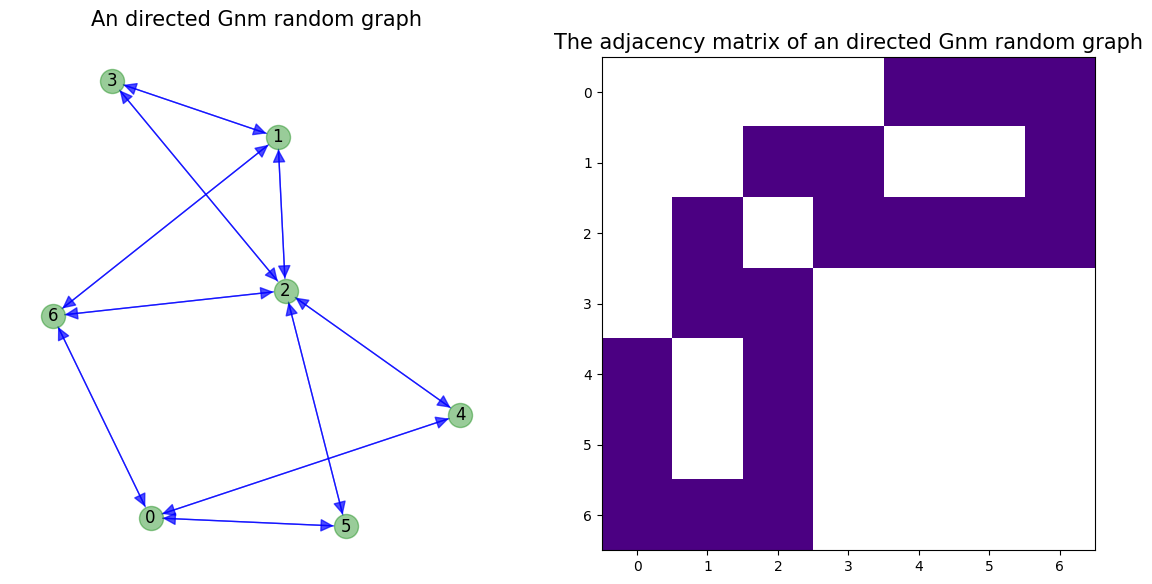

In [28]:
G = nx.gnm_random_graph(n=7, m=10, directed=True)

for e in G.edges():
    if (e[1],e[0]) not in G.edges():
        G.add_edge(*(e[1],e[0]))
        
name = "directed Gnm random graph"

A = nx.adjacency_matrix(G)
print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'indigo']),interpolation="none")
plt.xticks(list(G.nodes()));
plt.yticks(list(G.nodes()));
plt.title("The adjacency matrix of an "+name,fontsize=15);

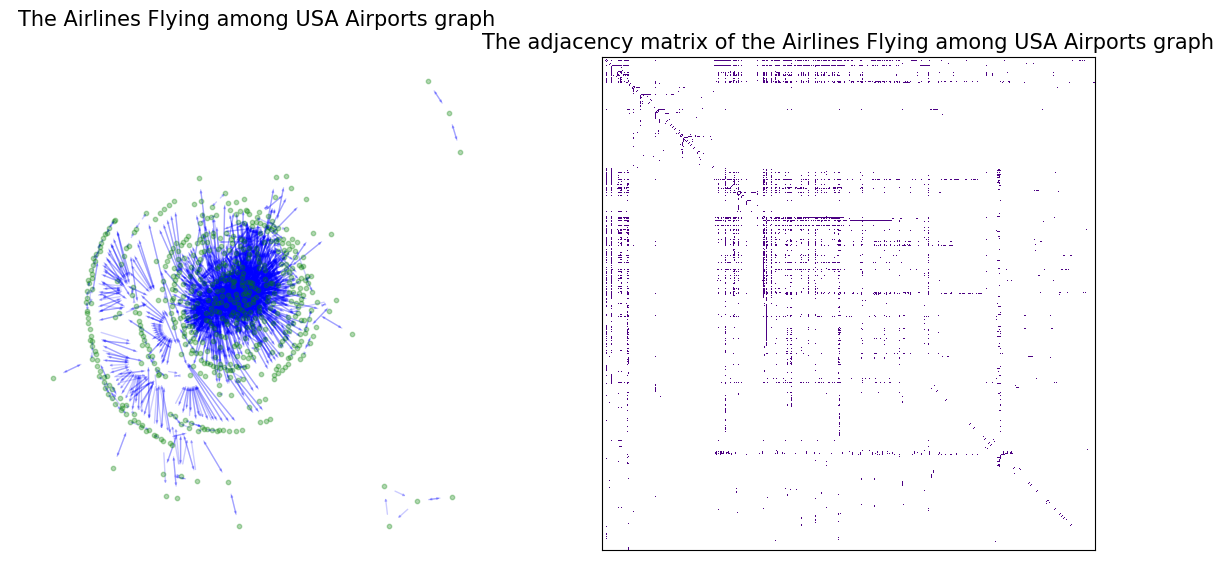

In [29]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
name = "Airlines Flying among USA Airports graph"

A = nx.adjacency_matrix(G)
# print(A.todense())

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.3, node_size=10)
nx.draw_networkx_edges(G, pos, arrowsize=3,edge_color="b", alpha=0.2)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name,fontsize=15);
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
plt.imshow(adjacency_matrix,cmap=matplotlib.colors.ListedColormap(['white', 'indigo']),interpolation="none")
# plt.xticks(list(G.nodes()));
# plt.yticks(list(G.nodes()));
# node_labels = list(G.nodes())
plt.xticks([]) #plt.xticks(ticks=range(len(node_labels)), labels=node_labels, rotation=90, fontsize=8)
plt.yticks([]) #plt.yticks(ticks=range(len(node_labels)), labels=node_labels, fontsize=8)
plt.title("The adjacency matrix of the "+name,fontsize=15);

#### Weighted Graphs

[[0 0 0 0 0 0 0 0 8 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 7 0 2 0 0 0 0 0 0 0 0 3 6 7 0]
 [0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 9]
 [0 0 2 0 0 9 0 0 0 0 0 0 0 0 0 0 0 6 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 7 0 9 0 0 0 4 0 0 0 0 1 2 0 0 0 0 5 4]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 6]
 [0 2 0 0 0 4 7 0 9 0 0 0 0 0 0 0 3 0 0 0]
 [8 0 0 0 0 0 0 9 0 7 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 9]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 7 2 0 5 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 8 0]
 [6 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 7 2 0 0 5 8 0 0 3 0]
 [0 0 0 0 0 0 0 0 4 0 2 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 3 0 0 5 0 2 0 0 0 0 0 0 0]
 [0 6 0 6 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 7 0 2 0 5 0 0 0 0 0 8 0 3 0 0 0 0 0 0]
 [0 0 9 0 0 4 6 0 0 9 0 0 0 0 0 0 0 0 0 0]]


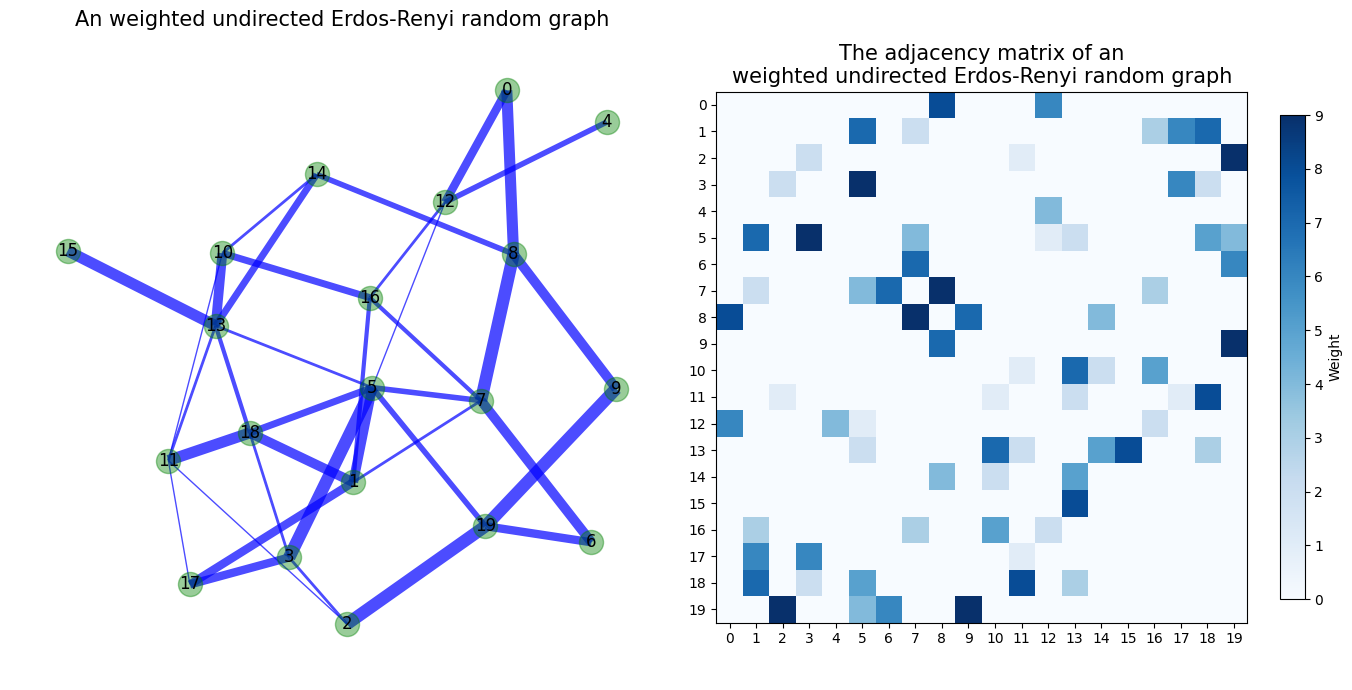

In [30]:
G = nx.erdos_renyi_graph(20, 0.2)
name = "weighted undirected Erdos-Renyi random graph"

# Assign random weights to edges
weight = {}
maxw = 10
for edge in G.edges():
    ed = edge[0]
    de = edge[1]
    G[ed][de]['weight'] = random.randrange(1, maxw)
    weight[(ed, de)] = G[ed][de]['weight']

weight_list = [weight[e] for e in G.edges()]

# Create adjacency matrix
A = nx.adjacency_matrix(G)
print(A.todense())

# Set edge widths based on weights
edge_width = [G[u][v]['weight'] for u, v in G.edges()]

# Create the plot
plt.figure(figsize=(14, 7))

# First subplot for graph visualization
plt.subplot(121)
pos = graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.title("An " + name, fontsize=15)

# Second subplot for adjacency matrix
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
cmap = plt.cm.Blues
edge_color = weight_list
vmin = min(edge_color) - 1
vmax = max(edge_color)
ax = plt.gca()  # Get the current axes

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add colorbar with the correct axes
cbar = plt.colorbar(sm, ax=ax, label="Weight", shrink=0.75)
plt.xticks(list(G.nodes()))
plt.yticks(list(G.nodes()))
plt.title("The adjacency matrix of an\n" + name, fontsize=15)

plt.tight_layout()
plt.show()

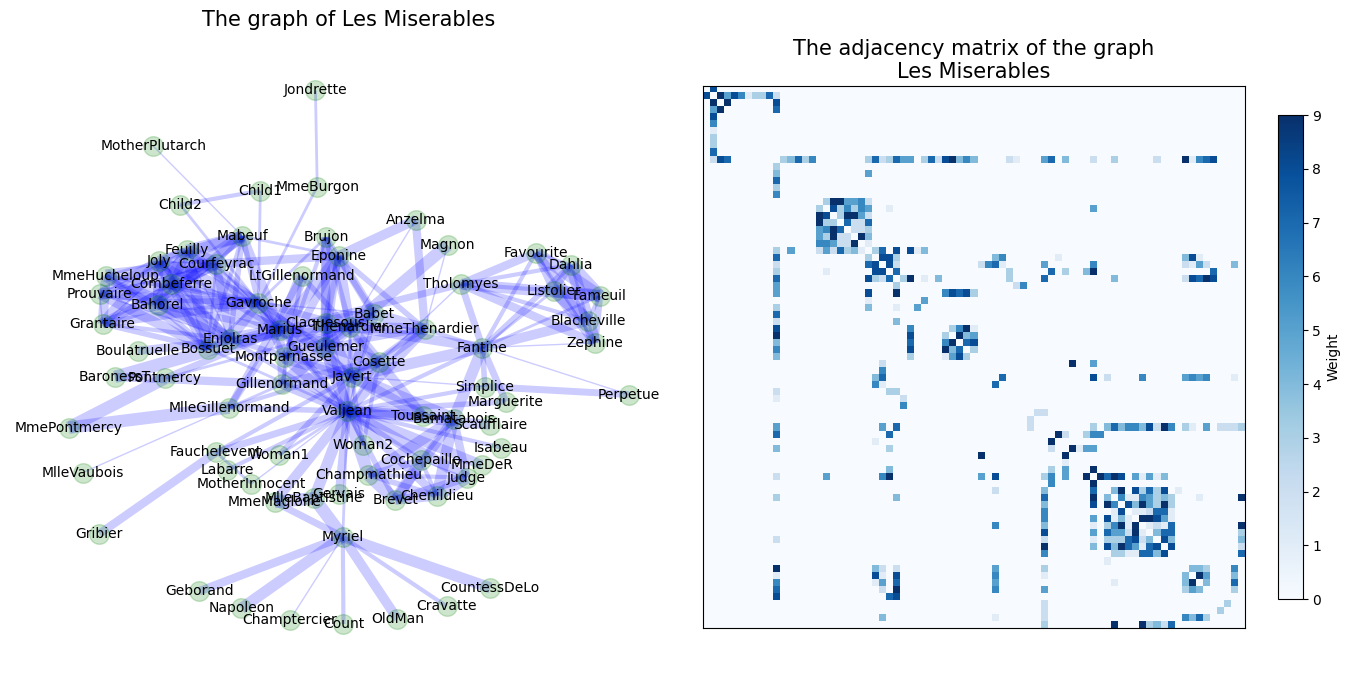

In [31]:
G=nx.les_miserables_graph()
name = "Les Miserables"

# Assign random weights to edges
weight = {}
maxw = 10
for edge in G.edges():
    ed = edge[0]
    de = edge[1]
    G[ed][de]['weight'] = random.randrange(1, maxw)
    weight[(ed, de)] = G[ed][de]['weight']

weight_list = [weight[e] for e in G.edges()]

# Create adjacency matrix
A = nx.adjacency_matrix(G)
# print(A.todense())

# Set edge widths based on weights
edge_width = [G[u][v]['weight'] for u, v in G.edges()]

# Create the plot
plt.figure(figsize=(14, 7))

# First subplot for graph visualization
plt.subplot(121)
pos = graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2, node_size=200)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color="b", alpha=0.2)
nx.draw_networkx_labels(G, pos,font_size=10)
plt.axis('off')
plt.title("The graph of " + name, fontsize=15)

# Second subplot for adjacency matrix
plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
cmap = plt.cm.Blues
edge_color = weight_list
vmin = min(edge_color) - 1
vmax = max(edge_color)
ax = plt.gca()  # Get the current axes

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add colorbar with the correct axes
cbar = plt.colorbar(sm, ax=ax, label="Weight", shrink=0.75)
# plt.xticks(list(G.nodes()))
# plt.yticks(list(G.nodes()))
plt.xticks([])
plt.yticks([])
plt.title("The adjacency matrix of the graph\n" + name, fontsize=15)

plt.tight_layout()
plt.show()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 4 3 0 0 0 1]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 7 0 0 0 7 0 0 0 3 0 0]
 [0 0 0 0 0 2 0 0 0 0 6 7 0 0 0 0 0 7 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 6 0 0 5 7 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 7 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0 0 0 0 0 8 7 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]]


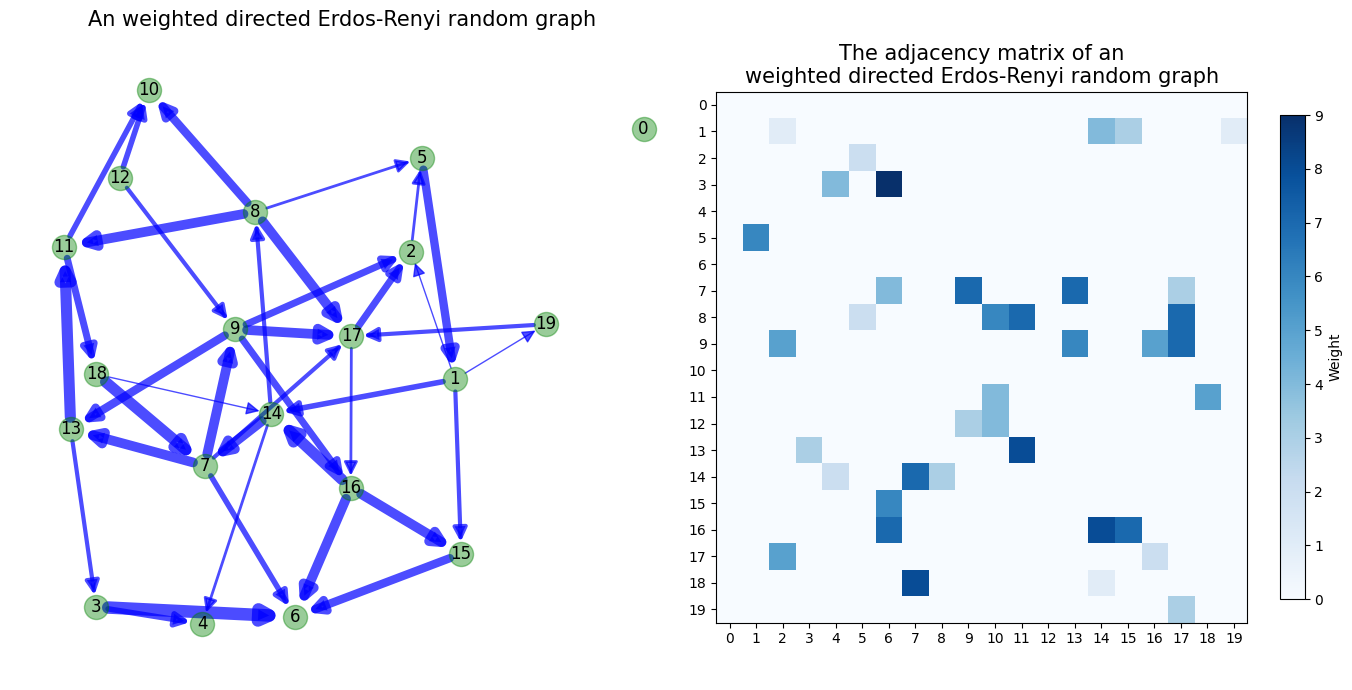

In [32]:
G = nx.erdos_renyi_graph(20,0.1,directed=True)
name = "weighted directed Erdos-Renyi random graph"

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,width=edge_width, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
cmap = plt.cm.Blues
edge_color = weight_list
vmin = min(edge_color) - 1
vmax = max(edge_color)
ax = plt.gca()  # Get the current axes

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add colorbar with the correct axes
cbar = plt.colorbar(sm, ax=ax, label="Weight", shrink=0.75)
plt.xticks(list(G.nodes()))
plt.yticks(list(G.nodes()))
plt.title("The adjacency matrix of an\n" + name, fontsize=15)

plt.tight_layout()
plt.show()

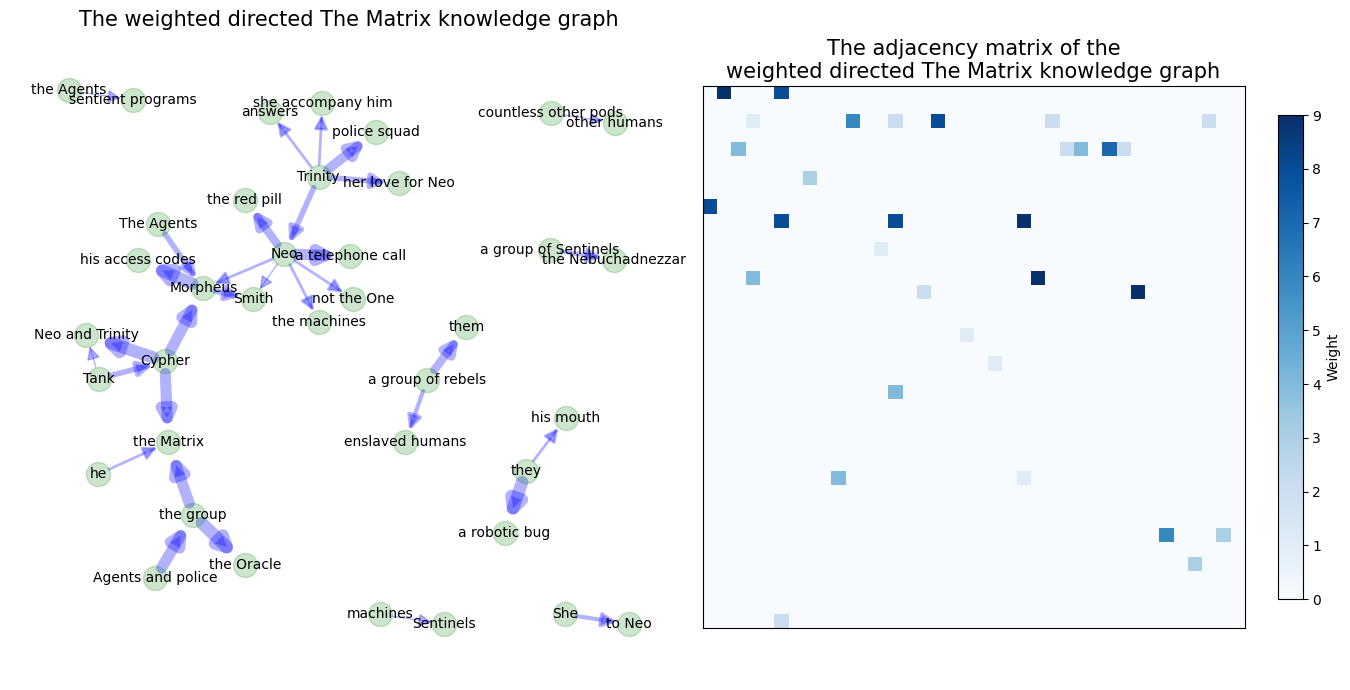

In [33]:
with open("TheMatrixNG.pickle", "rb") as f:
    G = pickle.load(f)
name = "weighted directed The Matrix knowledge graph"

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
weight={}
maxw=10
for edge in G.edges():
    ed=edge[0]
    de=edge[1]
    G[ed][de]['weight']=random.randrange(1,maxw)
    weight[(ed,de)]=G[ed][de]['weight']
weight_list = [ weight[e] for e in G.edges() ]

A = nx.adjacency_matrix(G)
# print(A.todense())

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20,width=edge_width, edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos,font_size=10)
plt.axis('off');
plt.title("The "+name,fontsize=15);

plt.subplot(122)
adjacency_matrix = nx.to_numpy_array(G)
cmap = plt.cm.Blues
edge_color = weight_list
vmin = min(edge_color) - 1
vmax = max(edge_color)
ax = plt.gca()  # Get the current axes

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap=cmap, interpolation="none")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Add colorbar with the correct axes
cbar = plt.colorbar(sm, ax=ax, label="Weight", shrink=0.75)
# plt.xticks(list(G.nodes()))
# plt.yticks(list(G.nodes()))
plt.xticks([])
plt.yticks([])
plt.title("The adjacency matrix of the\n" + name, fontsize=15)

plt.tight_layout()
plt.show()

<a id='6'></a>
## <span style="color:green">6. Subgraphs</span>

* Let $G = (V,E)$ be a graph and $X$ be a (nontrivial) subset of nodes (i.e., $X \subset V$). Then, the **(induced) subgraph** by $X$ is a graph $G(X) = (X,E(X))$ having set of nodes $X$ and set of edges $E(X)$ consisting of all edges in $E$ with end points in $X$.


* Let $G = (V,E)$ be a graph and $Y$ be a (nontrivial) subset of edges (i.e., $Y \subset E$). Then, the **(induced) subgraph** by $Y$ is a graph $G(Y) = (V(Y),Y)$ having set of edges $Y$ and set of nodes $V(Y)$ consisting of all nodes in $V$ which are end points of edges in $Y$.

### Subgraphs induced by a subset of nodes

Subgraph of ['Acciaiuoli', 'Barbadori', 'Castellani', 'Ginori', 'Guadagni', 'Lamberteschi', 'Peruzzi', 'Salviati', 'Strozzi', 'Tornabuoni']


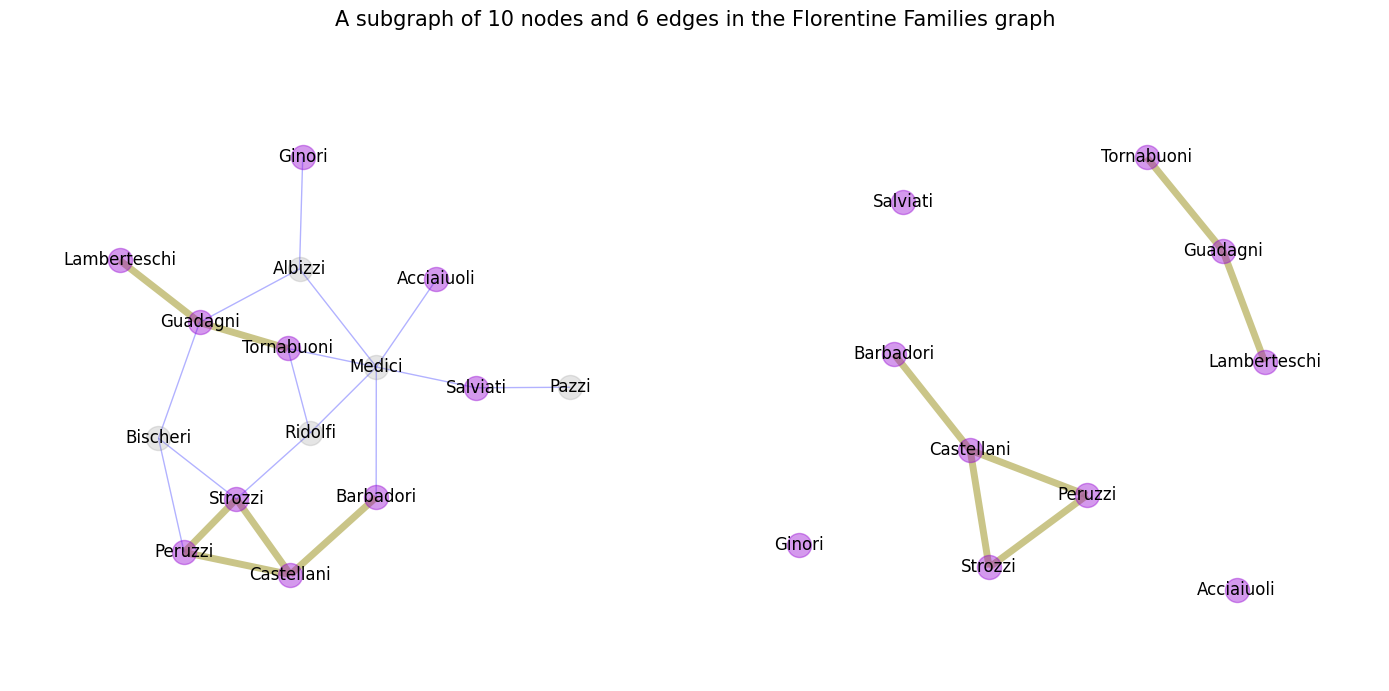

In [34]:
G=nx.florentine_families_graph() 

X=sorted(random.sample(G.nodes(),10))
print("Subgraph of",X)

GX=G.subgraph(X)
# print(X==sorted(GX.nodes()))
# print("Subgraph isolates:",list(nx.isolates(GX)))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in the Florentine Families graph" %(len(X),len(eX))

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
pos=graphviz_layout(GX)
nodes = nx.draw_networkx_nodes(GX, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GX, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GX, pos)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of ['DN21', 'Feather', 'Gallatin', 'Hook', 'SN100', 'SN4', 'SN63', 'SN89', 'SN90', 'Web']


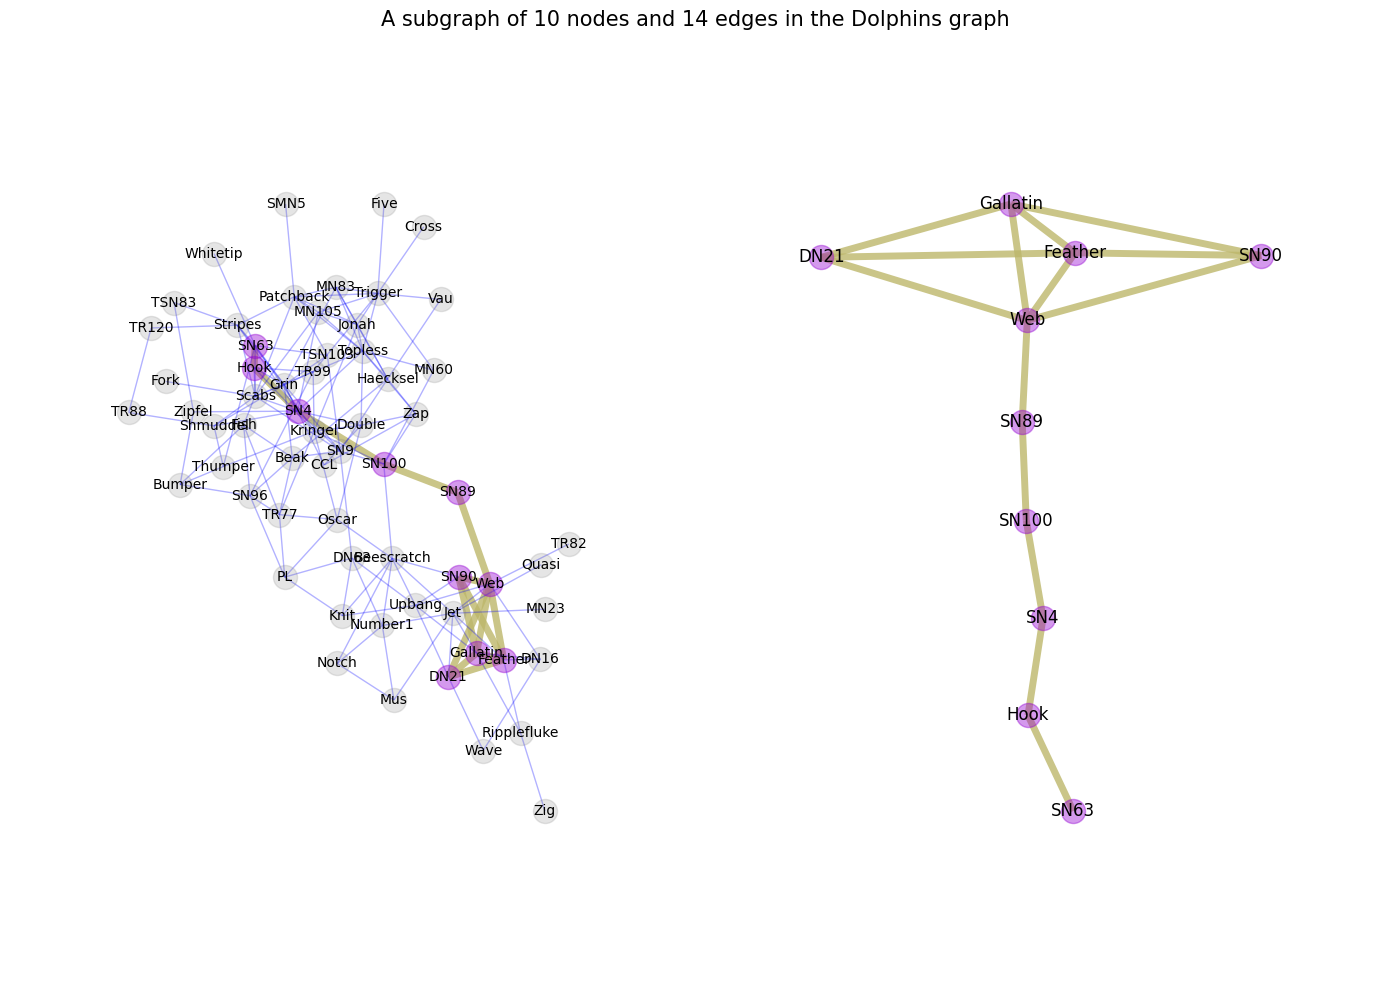

In [35]:
G = nx.read_gml("dolphins.gml") 

while True:
    X=sorted(random.sample(G.nodes(),10))
    GX=G.subgraph(X)
    if nx.is_connected(GX) and nx.density(GX)>0.3:
        break
        
print("Subgraph of",X)

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in the Dolphins graph" %(len(X),len(eX))

plt.figure(figsize=(14,10))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos,font_size=10)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
pos=graphviz_layout(GX)
nodes = nx.draw_networkx_nodes(GX, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GX, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GX, pos,font_size=12)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of ['Bahorel', 'Bossuet', 'Brevet', 'Courfeyrac', 'Fauchelevent', 'Grantaire', 'Joly', 'Labarre', 'Mabeuf', 'Woman2']


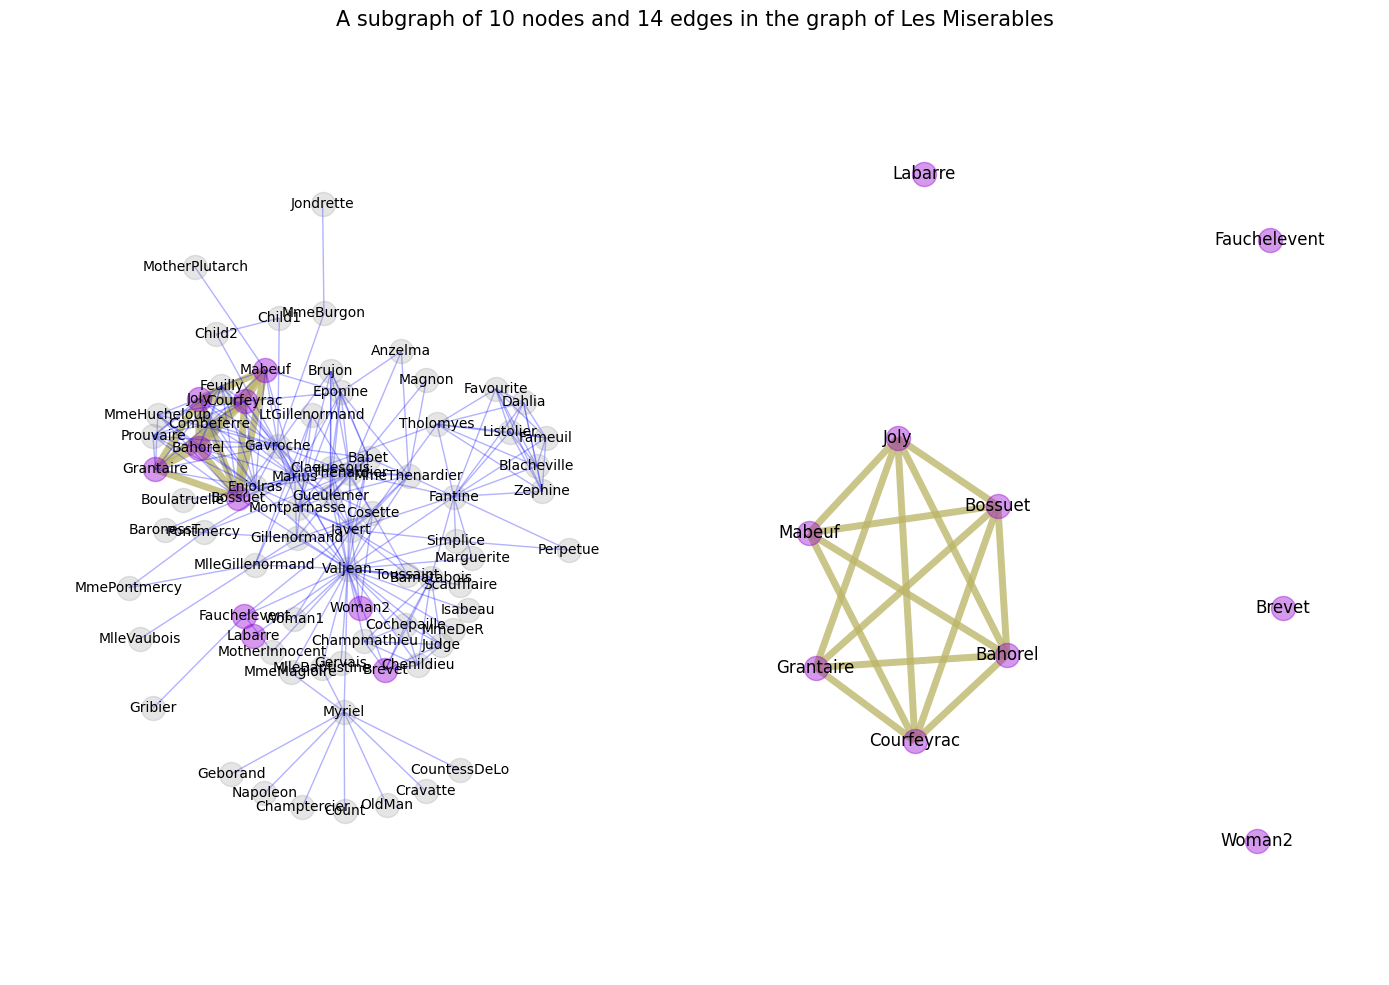

In [36]:
G=nx.les_miserables_graph()

while True:
    X=sorted(random.sample(G.nodes(),10))
    GX=G.subgraph(X)
    if nx.density(GX)>0.3:
        break
        
print("Subgraph of",X)

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

name="A subgraph of %i nodes and %i edges in the graph of Les Miserables" %(len(X),len(eX))

plt.figure(figsize=(14,10))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=ceX,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos,font_size=10)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
pos=graphviz_layout(GX)
nodes = nx.draw_networkx_nodes(GX, pos, nodelist=X,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GX, pos,edgelist=eX,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GX, pos,font_size=12)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of ['Atlantic City International Airport', 'Austin Straubel International Airport', 'Baton Rouge Metropolitan, Ryan Field', "Chicago O'Hare International Airport", 'Circle City /New/ Airport', 'Hartsfield Jackson Atlanta International Airport', 'Lehigh Valley International Airport', 'Montgomery Regional (Dannelly Field) Airport', 'Port Columbus International Airport', 'Salisbury Ocean City Wicomico Regional Airport']


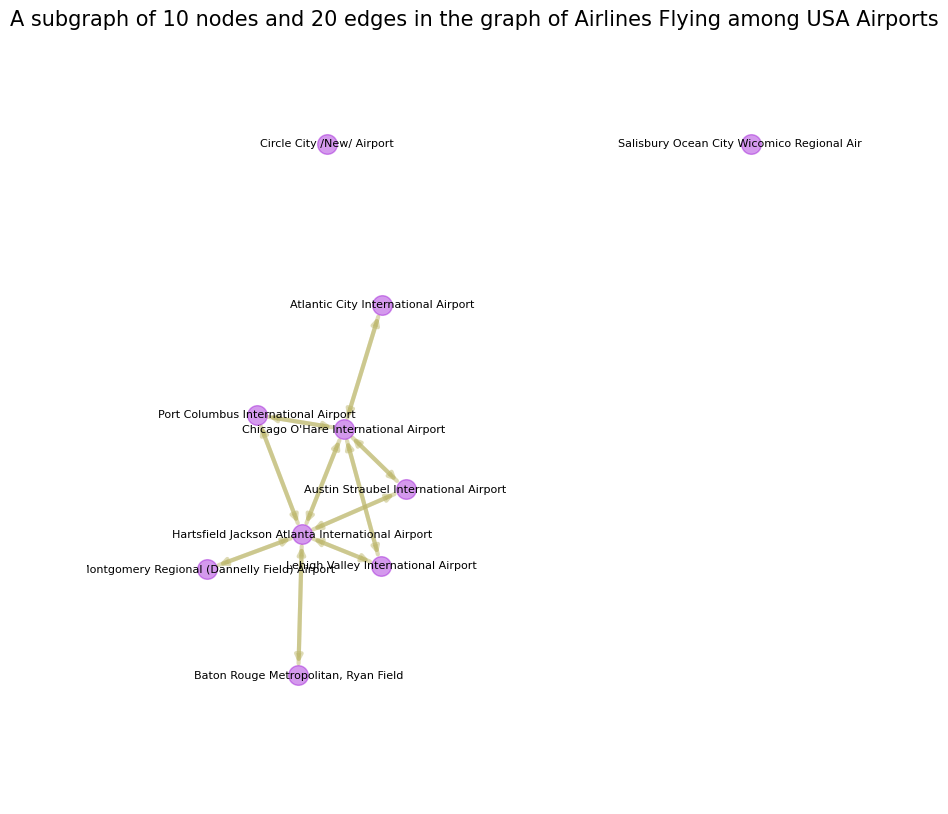

In [37]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
wcc = list(nx.weakly_connected_components(G))
largest_wcc = max(wcc, key=len)
Gs=G.subgraph(largest_wcc)

while True:
    X=sorted(random.sample(Gs.nodes(),10))
    GX=Gs.subgraph(X)
    if nx.density(GX)>0.2 and len(list(nx.isolates(GX)))<3:
        break
        
print("Subgraph of",X)

cX=[n for n in Gs.nodes() if n not in X]
eX=[e for e in Gs.edges() if e[0] in X and e[1] in X]
ceX=[e for e in Gs.edges() if e not in eX]

name=f"A subgraph of {len(X)} nodes and {len(eX)} edges in the graph of Airlines Flying among USA Airports"
pos=graphviz_layout(GX)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(GX, pos, nodelist=X,node_color="darkviolet", alpha=0.4, node_size=200)
nx.draw_networkx_edges(GX, pos,edgelist=eX,edge_color="darkkhaki",width=3,alpha=0.5)
labels = {node: str(node) for node in X}
nx.draw_networkx_labels(GX, pos, labels=labels,font_size=8)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

### Subgraphs induced by a subset of edges

Subgraph of [('Strozzi', 'Ridolfi'), ('Acciaiuoli', 'Medici'), ('Medici', 'Salviati'), ('Guadagni', 'Lamberteschi'), ('Tornabuoni', 'Guadagni'), ('Bischeri', 'Guadagni')]


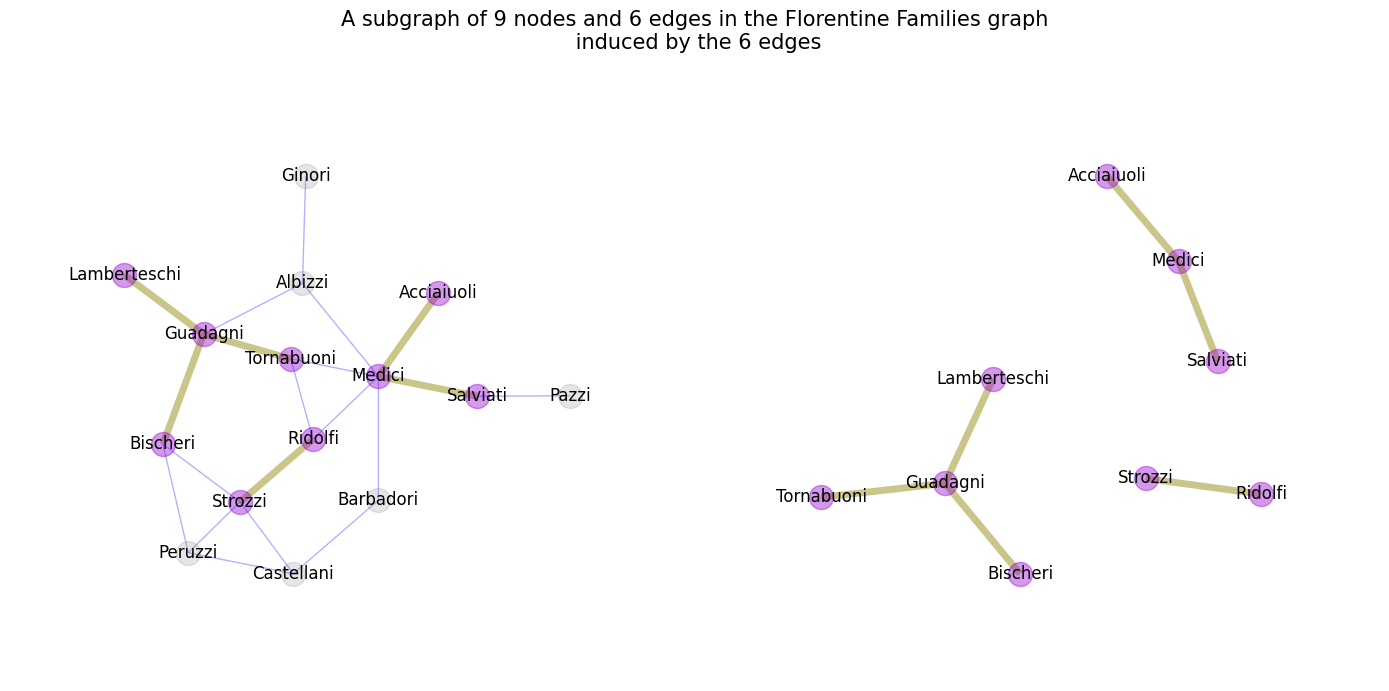

In [38]:
G=nx.florentine_families_graph() 

Y=random.sample(G.edges(),6)
print("Subgraph of",Y)

GY=G.edge_subgraph(Y)

cY=[e for e in G.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in G.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in the Florentine Families graph\n induced by the %i edges" %(len(nY),len(Y),len(Y))

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cnY,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,edgelist=cY,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.subplot(122)
pos=graphviz_layout(GY)
nodes = nx.draw_networkx_nodes(GY, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GY, pos,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GY, pos)
plt.axis('off');
plt.margins(x=0.2, y=0.2)

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of [('SN63', 'Thumper'), ('MN83', 'Topless'), ('Five', 'Trigger'), ('Grin', 'Hook'), ('DN21', 'Web'), ('CCL', 'Zap'), ('Feather', 'Gallatin'), ('DN63', 'SN9'), ('DN16', 'Web'), ('Double', 'Topless'), ('Scabs', 'TR99'), ('DN16', 'Wave'), ('Notch', 'Number1'), ('Upbang', 'Web'), ('DN21', 'Gallatin'), ('Patchback', 'TSN103'), ('Shmuddel', 'SN4'), ('CCL', 'Double'), ('Gallatin', 'Web'), ('Hook', 'Scabs')]


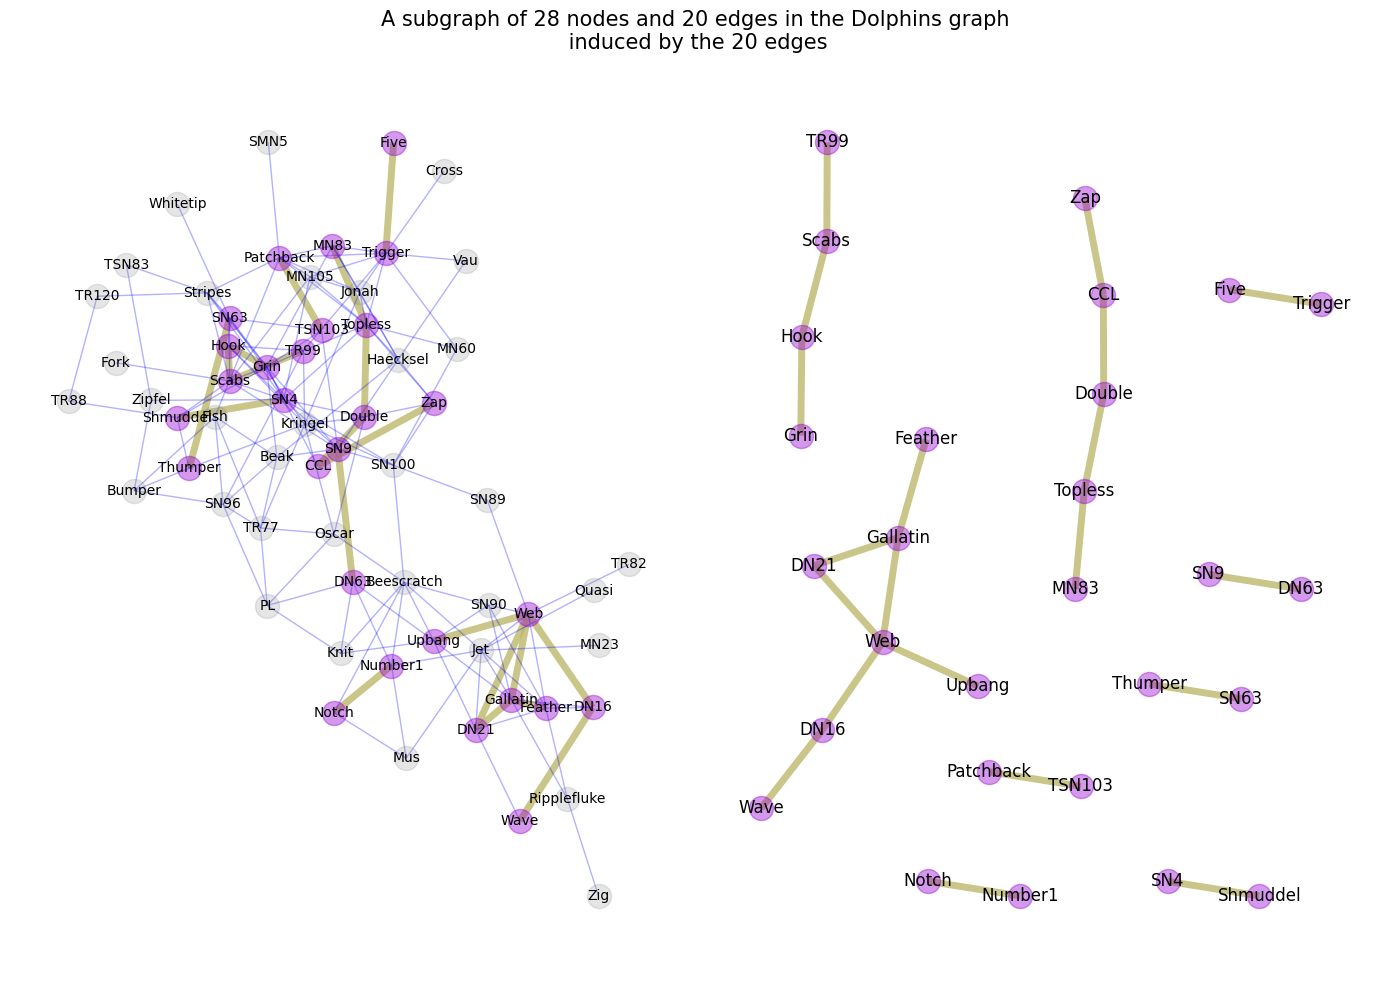

In [39]:
G = nx.read_gml("dolphins.gml")

Y=random.sample(G.edges(),20)
print("Subgraph of",Y)

GY=G.edge_subgraph(Y)

cY=[e for e in G.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in G.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in the Dolphins graph\n induced by the %i edges" %(len(nY),len(Y),len(Y))

plt.figure(figsize=(14,10))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cnY,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=cY,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos,font_size=10)
plt.axis('off');

plt.subplot(122)
pos=graphviz_layout(GY)
nodes = nx.draw_networkx_nodes(GY, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GY, pos,arrowsize=20,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GY, pos,font_size=12)
plt.axis('off');

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of [('Fantine', 'Perpetue'), ('MmeThenardier', 'Thenardier'), ('Marius', 'Courfeyrac'), ('Prouvaire', 'Bossuet'), ('Valjean', 'Enjolras'), ('Zephine', 'Fantine'), ('Javert', 'Enjolras'), ('MmeThenardier', 'Magnon'), ('Fameuil', 'Fantine'), ('Marius', 'Mabeuf')]


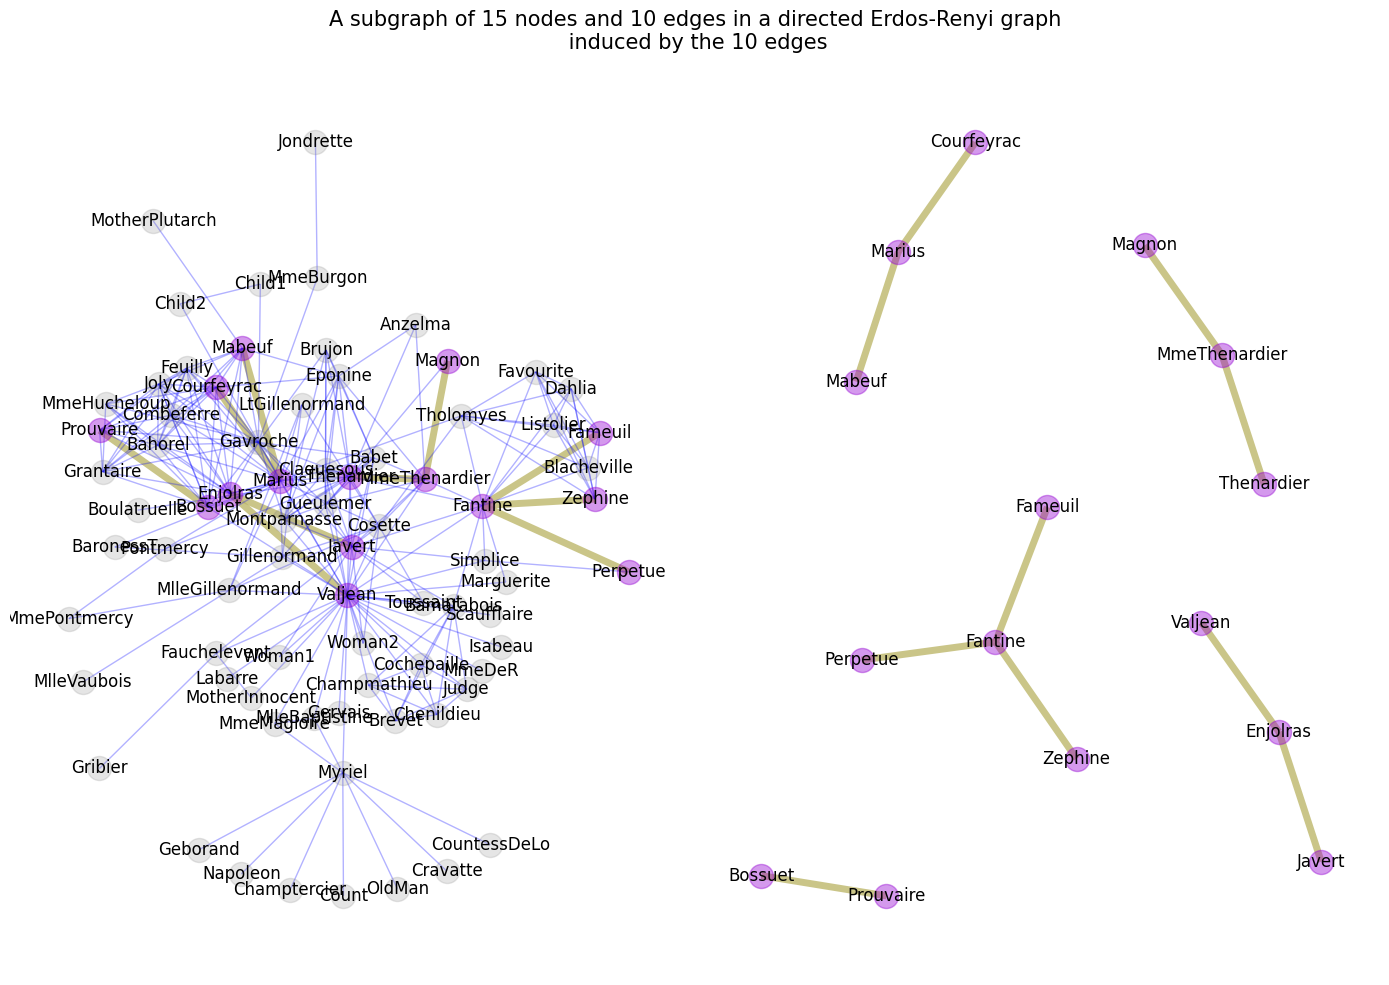

In [40]:
G=nx.les_miserables_graph()

Y=random.sample(G.edges(),10)
print("Subgraph of",Y)

GY=G.edge_subgraph(Y)

cY=[e for e in G.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in G.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in a directed Erdos-Renyi graph\n induced by the %i edges" %(len(nY),len(Y),len(Y))

plt.figure(figsize=(14,10))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cnY,node_color="grey", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_edges(G, pos,arrowsize=20,edgelist=cY,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos,font_size=12)
plt.axis('off');

plt.subplot(122)
pos=graphviz_layout(GY)
nodes = nx.draw_networkx_nodes(GY, pos, nodelist=nY,node_color="darkviolet", alpha=0.4)
nx.draw_networkx_edges(GY, pos,arrowsize=20,edgelist=Y,edge_color="darkkhaki",width=5,alpha=0.8)
nx.draw_networkx_labels(GY, pos,font_size=12)
plt.axis('off');

plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

Subgraph of ['Atlantic City International Airport', 'Austin Straubel International Airport', 'Baton Rouge Metropolitan, Ryan Field', "Chicago O'Hare International Airport", 'Circle City /New/ Airport', 'Hartsfield Jackson Atlanta International Airport', 'Lehigh Valley International Airport', 'Montgomery Regional (Dannelly Field) Airport', 'Port Columbus International Airport', 'Salisbury Ocean City Wicomico Regional Airport']


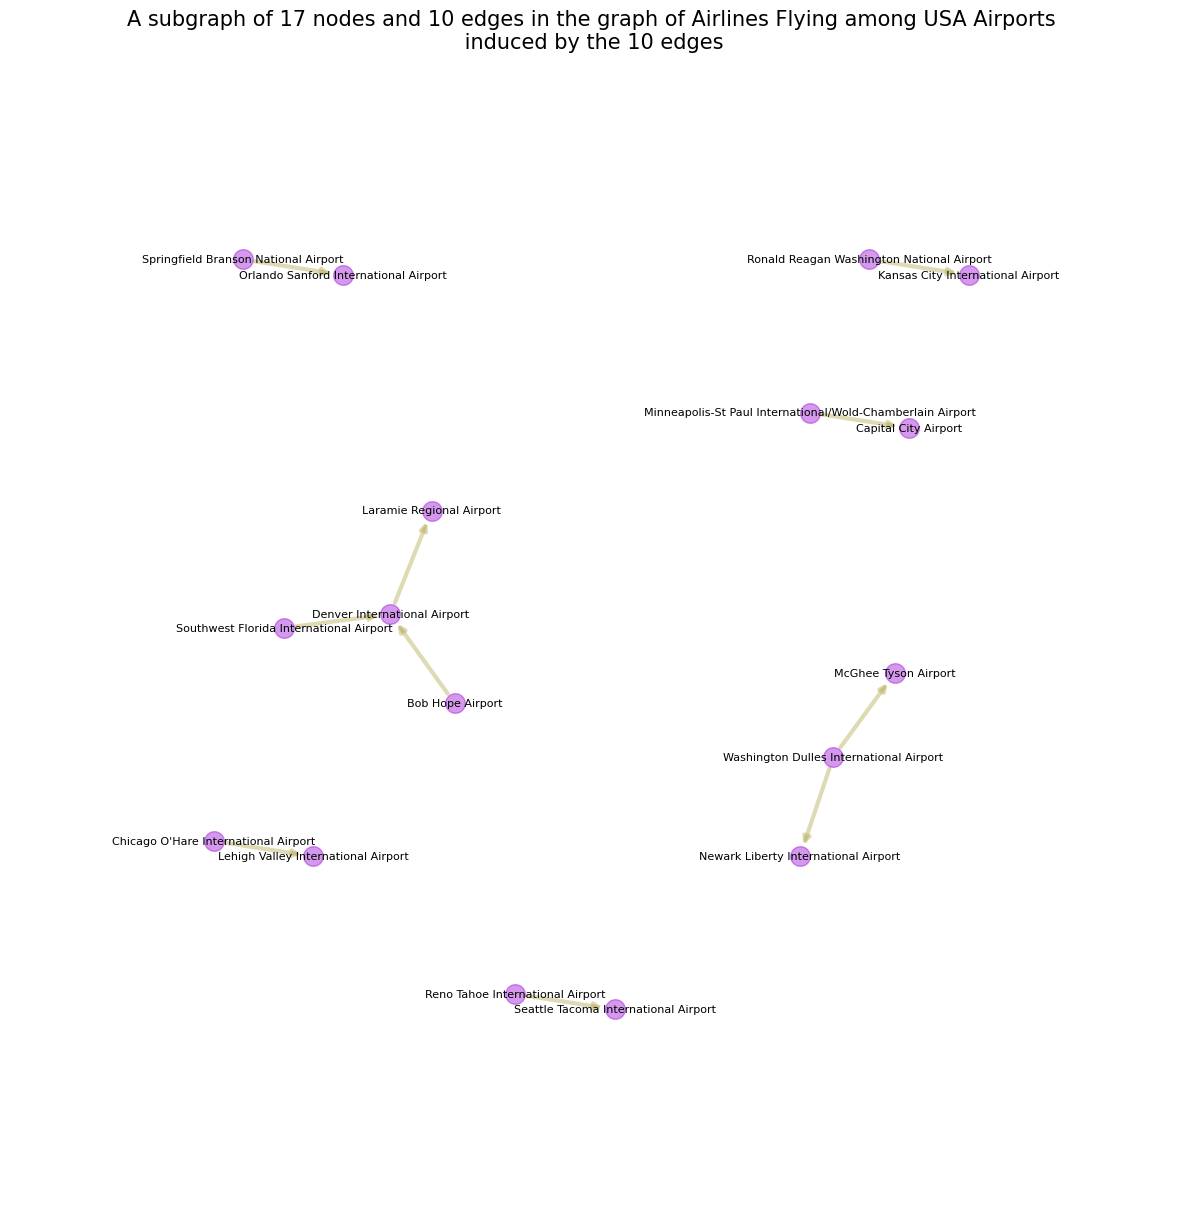

In [41]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
wcc = list(nx.weakly_connected_components(G))
largest_wcc = max(wcc, key=len)
Gs=G.subgraph(largest_wcc)

while True:
    Y=sorted(random.sample(Gs.edges(),10))  #find_k_weakly_connected_edges(Gs, k=20) #
    GY=Gs.edge_subgraph(Y)
    if nx.density(GY)>0.01: #and len(list(nx.isolates(GX)))<3:
        break
        
print("Subgraph of",X)

cY=[e for e in Gs.edges() if e not in Y]
nY=[]
for e in Y:
    if e[0] not in nY:
        nY.append(e[0])
    if e[1] not in nY:
        nY.append(e[1])
cnY=[n for n in Gs.nodes() if n not in nY]

name="A subgraph of %i nodes and %i edges in the graph of Airlines Flying among USA Airports\n induced by the %i edges" %(len(nY),len(Y),len(Y))
pos=graphviz_layout(GY)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(GY, pos, nodelist=nY,node_color="darkviolet", alpha=0.4, node_size=200)
nx.draw_networkx_edges(GY, pos,edgelist=Y,edge_color="darkkhaki",width=3,alpha=0.5)
labels = {node: str(node) for node in nY}
nx.draw_networkx_labels(GY, pos, labels=labels,font_size=8)
plt.axis('off');
plt.title(name,fontsize=15);
plt.margins(x=0.2, y=0.2)

<a id='7'></a>
## <span style="color:green">7. Paths and Distances</span>

* In a graph, given a sequence of distinct nodes $v_1, v_2, \ldots, v_k$ (with $k \geq 2$) such that 
$(v_1,v_2), (v_2,v_3), \ldots, (v_{k-1},v_k)$ are all edges, then this sequence of edges is said to be a **path** in the graph (starting) from node $v_1$ (and ending) to node $v_k$. 


* In a directed graph, a **directed path** is again a sequence of edges, which connects a sequence of nodes, but with the added restriction that all the edges have the same direction. 


* Given two nodes $u, v$ in a graph, $u$ is said to **access** $v$ (or $v$ to be **reachable** by $u$) if there there exists a path from $u$ to $v$ in the graph. 


* In a graph, the **length** of a path is the number of edges in the path (as a sequence of edges connecting a sequence of nodes). 


* A path between two nodes $u$ and $v$ is called **geodesic** if it has the minimum length among all possible paths between these nodes. 


* In a graph, the **distance** $d(u,v)$ between two nodes $u$ and $v$ is the length of the geodesic path between these nodes. Notice that, if the graph is directed, then the distance between two nodes is the length of the geodesic *directed* path between them.


* In a graph $G = (V,E)$, the **average shortest path length (a.s.p.l.)** $a$ is the average value among all (geodesic) distances between the nodes of every pair of nodes in the graph, i.e.:

$$a = \frac{1}{n(n-1)} \sum_{u, v ∈ V} d(u,v)$$


* The **diameter** of a graph is the greatest distance between any pair of nodes.

#### Undirected Graphs

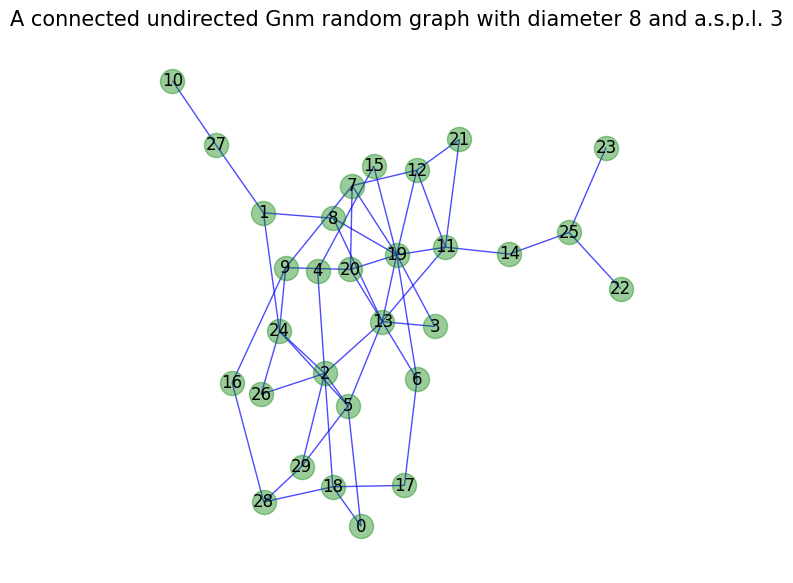

In [42]:
while True:
    n=random.randint(20,31)
    m=random.randint(50,61)
    G = nx.gnm_random_graph(n, m)
    if nx.is_connected(G)==True and nx.diameter(G)>7:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A connected undirected Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

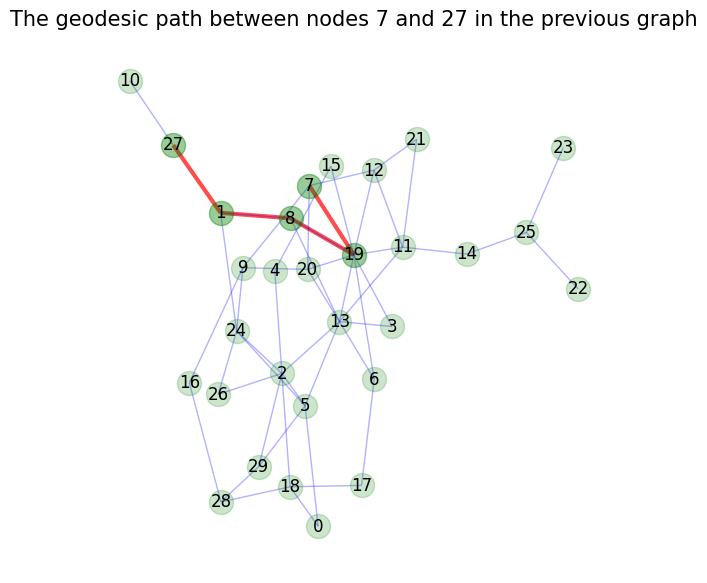

In [43]:
threshold=5 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>=threshold:
        break

gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path between nodes %i and %i in the previous graph" %(source,target)
plt.title(name,fontsize=15);

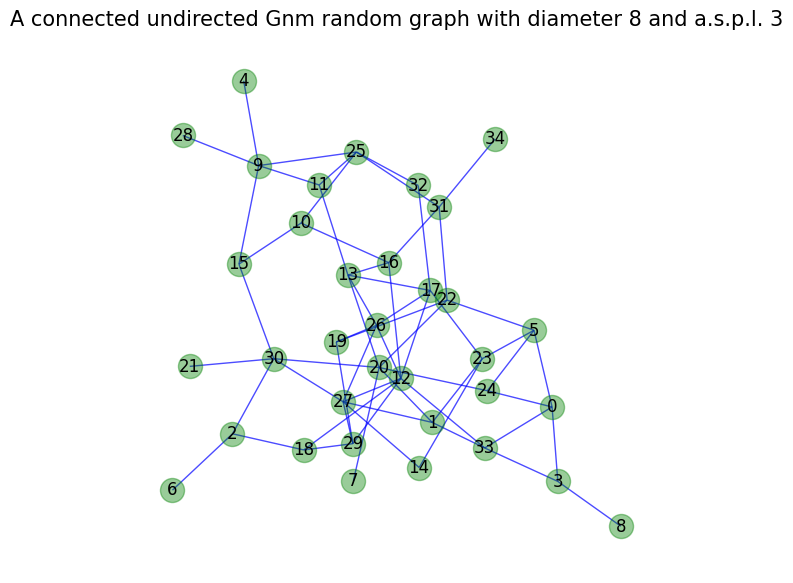

In [44]:
while True:
    n=random.randint(25,36)
    m=random.randint(60,71)
    G = nx.gnm_random_graph(n, m)
    if nx.is_connected(G)==True and nx.diameter(G)>7:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A connected undirected Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

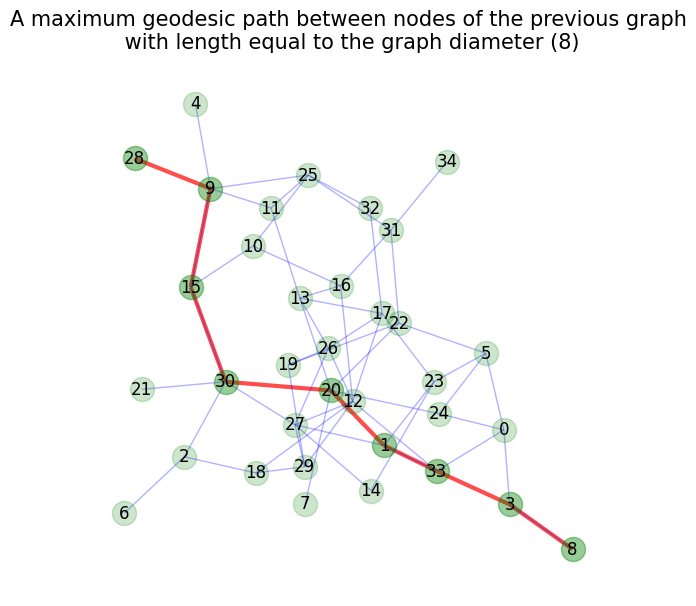

In [45]:
ndiam=[]
dd={}
for source in G.nodes():
    for target in G.nodes():
        if target!=source:
            gp=nx.dijkstra_path(G, source, target)
            dd[(source,target)]=gp #len(gp)-1
for k,v in dd.items():
    if len(v)-1==nx.diameter(G):
        ndiam.append(v)
gp=random.choice(ndiam)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A maximum geodesic path between nodes of the previous graph\n with length equal to the graph diameter (%i)" %nx.diameter(G) 
plt.title(name,fontsize=15);

#### Directed Graphs

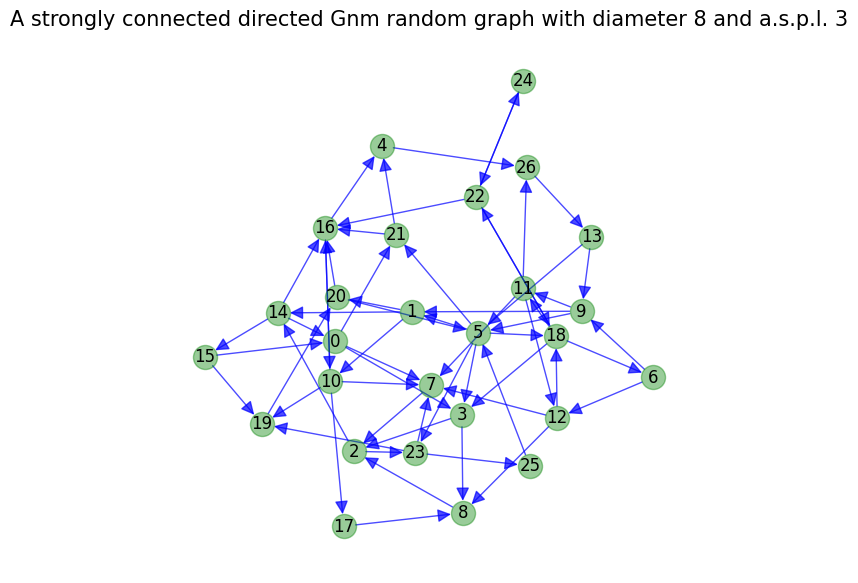

In [46]:
while True:
    n=random.randint(20,31)
    m=random.randint(50,61)
    G = nx.gnm_random_graph(n, m,directed=True)
    if nx.is_strongly_connected(G)==True and nx.diameter(G)>6 and nx.diameter(G)<9:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A strongly connected directed Gnm random graph with diameter %i and a.s.p.l. %i" %(nx.diameter(G),nx.algorithms.shortest_paths.generic.average_shortest_path_length(G))
plt.title(name,fontsize=15);

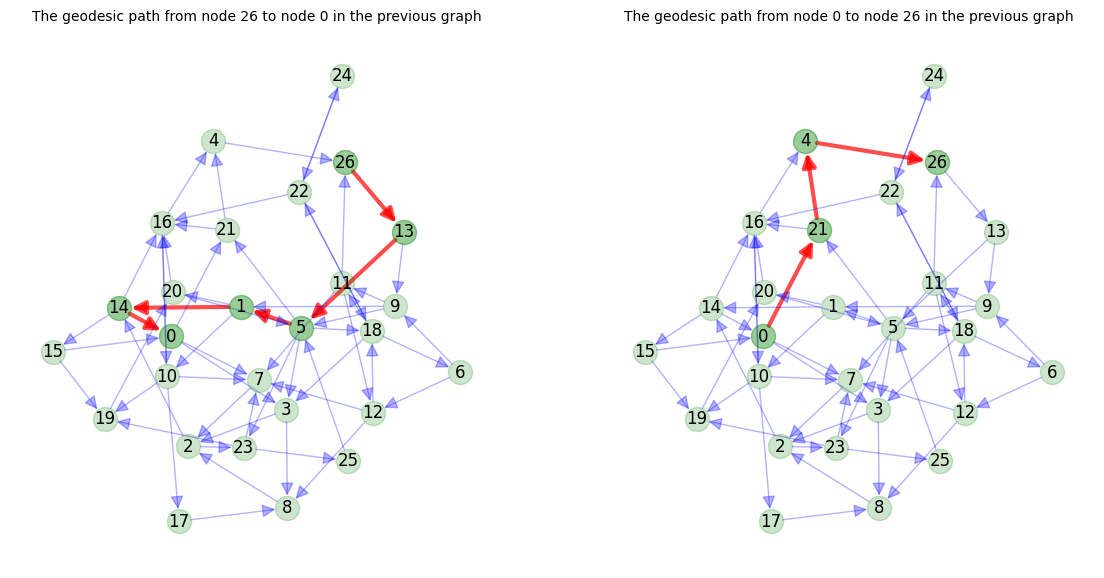

In [48]:
threshold=5 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>threshold:
        break
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph"  %(source,target)
plt.title(name,fontsize=10);

plt.subplot(122)
gp=nx.dijkstra_path(G, source=target, target=source)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph" %(target,source)
plt.title(name,fontsize=10);

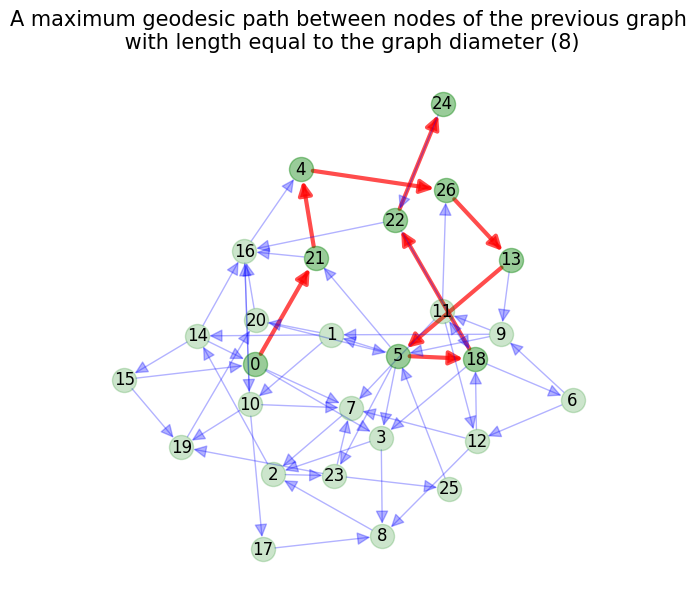

In [49]:
ndiam=[]
dd={}
for source in G.nodes():
    for target in G.nodes():
        if target!=source:
            gp=nx.dijkstra_path(G, source, target)
            dd[(source,target)]=gp #len(gp)-1
for k,v in dd.items():
    if len(v)-1==nx.diameter(G):
        ndiam.append(v)
gp=random.choice(ndiam)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="A maximum geodesic path between nodes of the previous graph\n with length equal to the graph diameter (%i)" %nx.diameter(G) 
plt.title(name,fontsize=15);

<a id='8'></a>
## <span style="color:green">8. Connectedness</span>

* An undirected graph is **connected** when there is a path between any pair of nodes. A graph that is not connected is **disconnected**. 


* A directed graph is called **strongly connected** if, for every pair of nodes $u, v$, it contains a directed path from $u$ to $v$ and a directed path from $v$ to $u$.


* A directed graph is called **weakly connected** if replacing all of its directed edges with undirected edges produces a connected (undirected) graph.

### <span style="color:green">Connected Components</span>

* In an undirected graph, a **connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by paths and which is connected to no additional nodes in the rest of the graph. A disconnected undirected graph contains more than one connected components and the **largest connected component** of the graph is that induced subgraph by the largest subset of nodes. Obviously, a connected graph has a single connected component and it coincides with its largest connected component.


* In a directed graph, a **strongly connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by *directed* paths and which is connected (by directed paths) to no additional nodes in the rest of the graph. Oviously, every strongly connected component is a strongly connected (sub)graph. In general, a directed graph may contain more than one strongly connected components and the **largest strongly connected component** of the graph is that induced subgraph by the largest subset of nodes. 


* In a directed graph, a **weakly connected component** is an induced subgraph from a subset of nodes, in which any two nodes are connected to each other by paths (having any direction on their edges) and which is connected (by such paths) to no additional nodes in the rest of the graph. Oviously, every weakly connected component is a weakly connected (sub)graph. In general, a directed graph may contain more than one weakly connected components and the **largest weakly connected component** of the graph is that induced subgraph by the largest subset of nodes. Obviously, the (largest) weakly components of a directed graph are (largest) connected components of the resulting undirected graph, when rescinding the direction of edhes in the directed graph.

#### Undirected Graphs

In [50]:
def connectedness(G,name):
    # G is undirected graph
    if nx.is_connected(G):
        print(name+" is connected.")
    else:
        k=len(list(nx.connected_components(G)))
        print(f"{name} consists of {k} connected components")

G = nx.read_gml("dolphins.gml")
connectedness(G,name="The Dolphins graph")
 
with open("AmericanFootballGraph.pickle", "rb") as f:
    G = pickle.load(f)
connectedness(G,name="The graph of American Football Games")

with open("jazz.pickle", "rb") as f:
    G = pickle.load(f)
connectedness(G,name="The graph of Jazz Musicians")

with open("LastFMAsiaSN.pickle", "rb") as f:
    G = pickle.load(f)
connectedness(G,name="The graph of LastFM Asia Friends")

The Dolphins graph is connected.
The graph of American Football Games is connected.
The graph of Jazz Musicians is connected.
The graph of LastFM Asia Friends is connected.


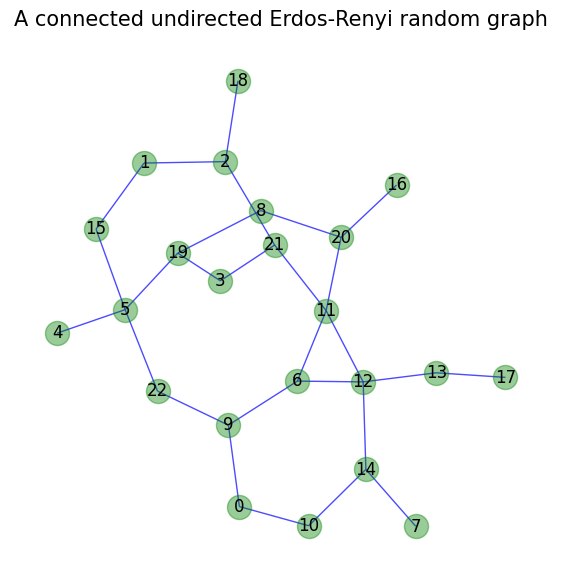

In [51]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="A connected undirected Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==True:
        break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

This disconnected undirected Erdos-Renyi random graph is a disconnected graph and it has 5 connected components
[[0, 1, 2, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23], [13, 5, 6], [4, 15], [24], [3]]
Component 1 with 18 nodes: [0, 1, 2, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23]
Component 2 with 3 nodes: [13, 5, 6]
Component 3 with 2 nodes: [4, 15]
Component 4 with 1 nodes: [24]
Component 5 with 1 nodes: [3]
The largest connected component of this graph has 18 nodes and 17 edges


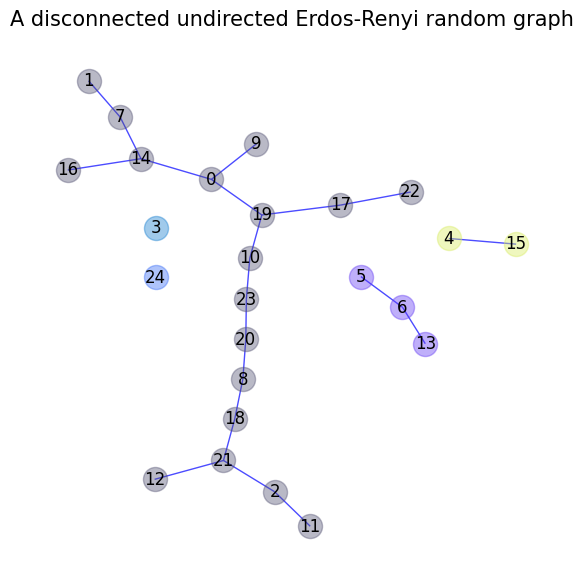

In [52]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="disconnected undirected Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_connected_components(G)>4:
        break

if nx.is_connected(G)==True:
    print("This %s is a connected graph" %name)
else:
    print("This %s is a disconnected graph and it has %i connected components" %(name,nx.number_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    print(lc)
    for i,c in enumerate(lc): 
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

#### Directed Graphs

In [53]:
def sconnectedness(G,name):
    # G is directed graph
    if nx.is_strongly_connected(G):
        print(name+" is strongly connected.")
    else:
        k=len(list(nx.strongly_connected_components(G)))
        print(f"{name} consists of {k} strongly connected components")
        
def wconnectedness(G,name):
    # G is directed graph
    if nx.is_weakly_connected(G):
        print(name+" is weakly connected.")
    else:
        k=len(list(nx.weakly_connected_components(G)))
        print(f"{name} consists of {k} weakly connected components")
        
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
name="The graph of Airlines Flying among USA Airports"
sconnectedness(G,name)
wconnectedness(G,name)

with open("TheMatrixNG.pickle", "rb") as f:
    G = pickle.load(f)
name="The Matrix knowledge graph"
sconnectedness(G,name)
wconnectedness(G,name)

The graph of Airlines Flying among USA Airports consists of 18 strongly connected components
The graph of Airlines Flying among USA Airports consists of 3 weakly connected components
The Matrix knowledge graph consists of 35 strongly connected components
The Matrix knowledge graph consists of 8 weakly connected components


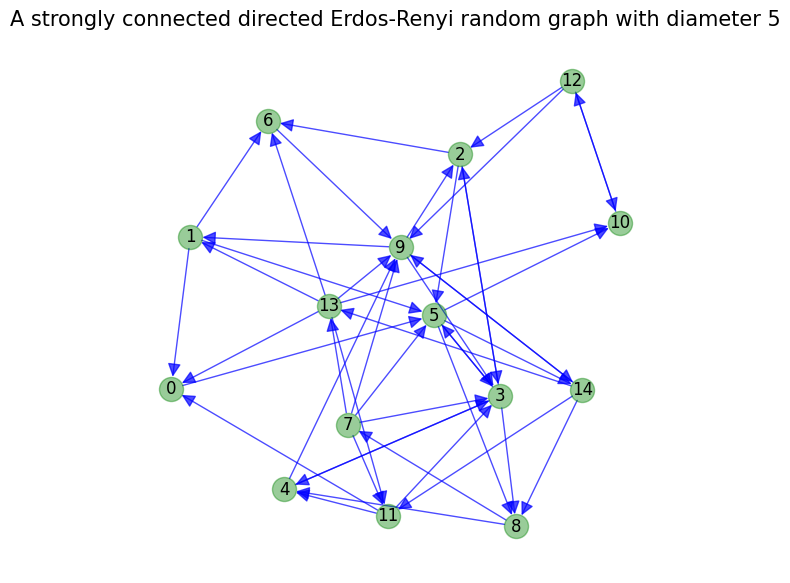

In [63]:
nodes=15 #random.randint(10,21)
p=0.2 #random.uniform(0.05,0.08)

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_strongly_connected(G)==True and nx.diameter(G)>4:
        break

name=f"A strongly connected directed Erdos-Renyi random graph with diameter {nx.diameter(G)}" #\n with diameter %i" %nx.diameter(G)

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

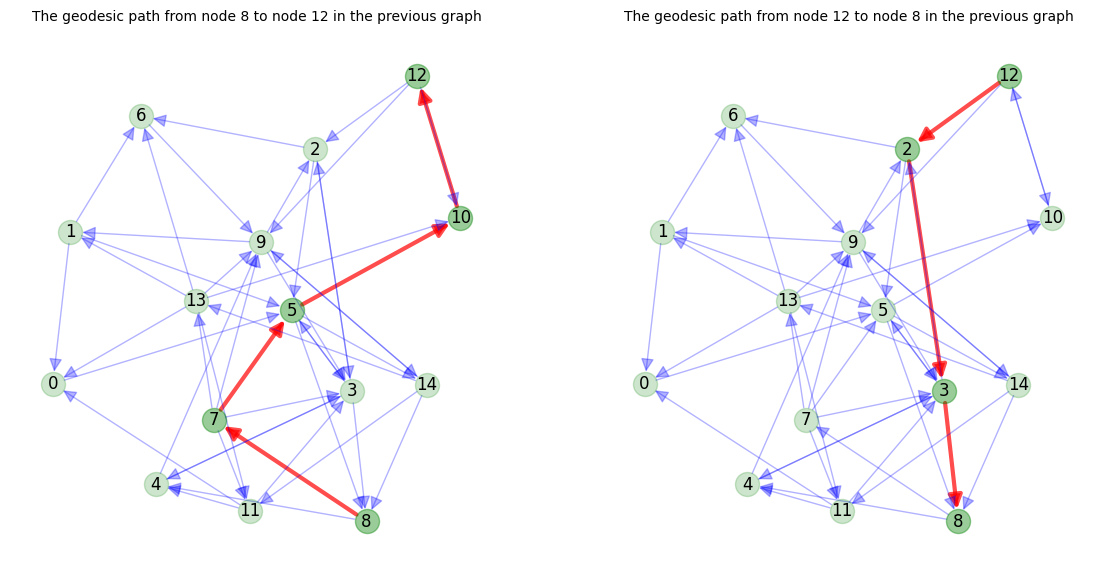

In [64]:
threshold=4 # it should be < diameter
source=random.choice(list(G.nodes()))
while True:
    target=random.choice(list(G.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(G, source, target)
    if len(gp)>threshold:
        break
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]

plt.figure(figsize=(14,7))
plt.subplot(121)
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph"  %(source,target)
plt.title(name,fontsize=10);

plt.subplot(122)
gp=nx.dijkstra_path(G, source=target, target=source)
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in G.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in G.nodes() if n not in ng]
nodes = nx.draw_networkx_nodes(G, pos,nodelist=ng, node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos,nodelist=nng, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowsize=20, edgelist=ngpe,edge_color="b", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
name="The geodesic path from node %i to node %i in the previous graph" %(target,source)
plt.title(name,fontsize=10);

This strongly disconnected directed Erdos-Renyi random graph is a strongly disconnected graph and it has 6 strongly connected components
Component 1 with 21 nodes: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24]
Component 2 with 1 nodes: [25]
Component 3 with 1 nodes: [16]
Component 4 with 1 nodes: [12]
Component 5 with 1 nodes: [11]
Component 6 with 1 nodes: [6]
The largest connected component of this graph has 21 nodes and 34 edges


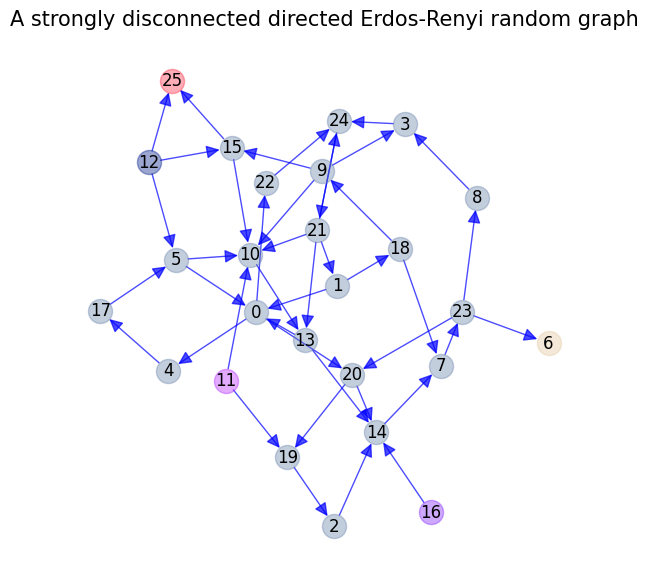

In [65]:
nodes=random.randint(20,31)
p=random.uniform(0.05,0.08)
name="strongly disconnected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
        break

if nx.is_strongly_connected(G)==True:
    print("This %s is a strongly connected graph" %name)
else:
    print("This %s is a strongly disconnected graph and it has %i strongly connected components" %(name,nx.number_strongly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.strongly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

Toksook Bay Airport Chautauqua County-Jamestown Airport ['Toksook Bay Airport', 'Mekoryuk Airport', 'Bethel Airport', 'Ted Stevens Anchorage International Airport', 'Los Angeles International Airport', 'Cleveland Hopkins International Airport', 'Chautauqua County-Jamestown Airport']


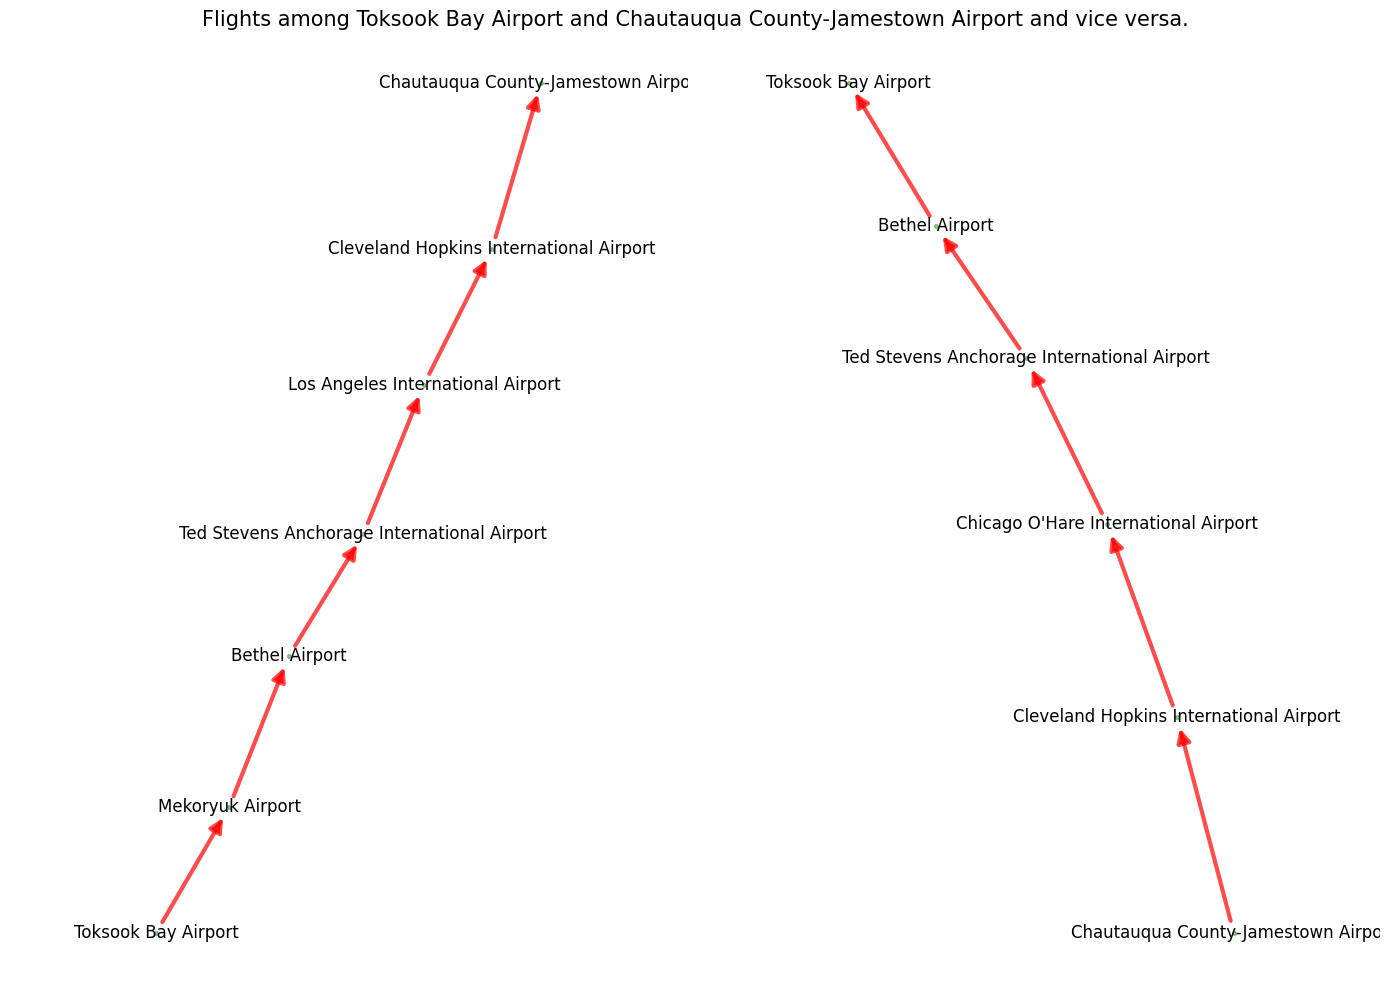

In [66]:
with open("USAflightsGraph.pickle", "rb") as f:
    G = pickle.load(f)
name="The graph of Airlines Flying among USA Airports"

scc = list(nx.strongly_connected_components(G))
largest_scc = max(scc, key=len)
Gs=G.subgraph(largest_scc)
# print(nx.diameter(Gs)) # 8

threshold=4 # it should be < diameter
source=random.choice(list(Gs.nodes()))
while True:
    target=random.choice(list(Gs.nodes()))
    if target!=source:
        pass
    gp=nx.dijkstra_path(Gs, source, target)
    if len(gp)>threshold:
        break
        
print(source,target,gp)
        
gpe=[(gp[i],gp[i+1]) for i in range(0,len(gp)-1)]
ngpe=[e for e in Gs.edges() if e not in gpe]
ng=list(set([x[0] for x in gpe]+[x[1] for x in gpe]))
nng=[n for n in Gs.nodes() if n not in ng]
Gss=Gs.edge_subgraph(gpe)

plt.figure(figsize=(14,10))
plt.subplot(121)
pos=graphviz_layout(Gss)
nodes = nx.draw_networkx_nodes(Gss, pos,nodelist=ng, node_color="g", alpha=0.4, node_size=7)
nx.draw_networkx_edges(Gss, pos, arrowsize=20, edgelist=gpe,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_labels(Gss, pos)
plt.axis('off');
plt.margins(x=0.3, y=0)

plt.subplot(122)
gpr=nx.dijkstra_path(Gs, source=target, target=source)
gper=[(gpr[i],gpr[i+1]) for i in range(0,len(gpr)-1)]
ngper=[e for e in Gs.edges() if e not in gper]
ngr=list(set([x[0] for x in gper]+[x[1] for x in gper]))
nngr=[n for n in Gs.nodes() if n not in ngr]
Gssr=Gs.edge_subgraph(gper)
posr=graphviz_layout(Gssr)
nodes = nx.draw_networkx_nodes(Gssr, posr,nodelist=ngr, node_color="g", alpha=0.4, node_size=7)
nx.draw_networkx_edges(Gssr, posr, arrowsize=20, edgelist=gper,edge_color="r",width=3, alpha=0.7)
nx.draw_networkx_labels(Gssr, posr)
plt.axis('off');
plt.margins(x=0.3, y=0)

name=f"Flights among {source} and {target} and vice versa."
plt.suptitle(name,fontsize=15);

plt.tight_layout()
plt.show()

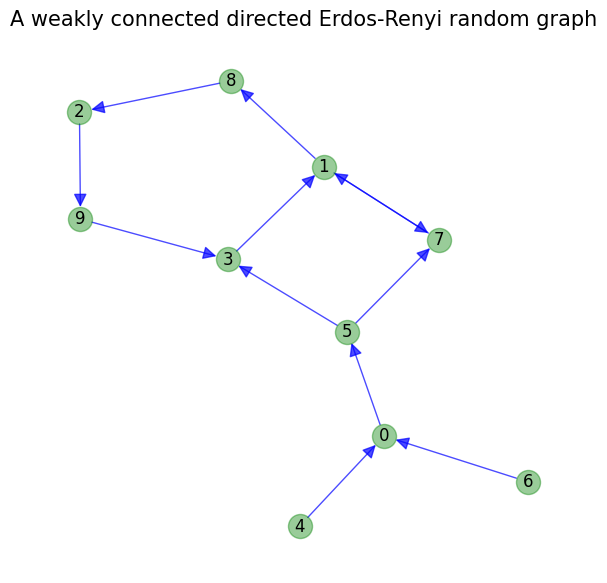

In [67]:
nodes=random.randint(10,21)
p=random.uniform(0.05,0.08)
name="A weakly connected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==True:
        if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
            break

plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

This weakly connected directed Erdos-Renyi random graph is a strongly disconnected graph and it has 5 strongly connected components
Component 1 with 6 nodes: [1, 2, 3, 7, 8, 9]
Component 2 with 1 nodes: [6]
Component 3 with 1 nodes: [5]
Component 4 with 1 nodes: [4]
Component 5 with 1 nodes: [0]
The largest connected component of this graph has 6 nodes and 7 edges


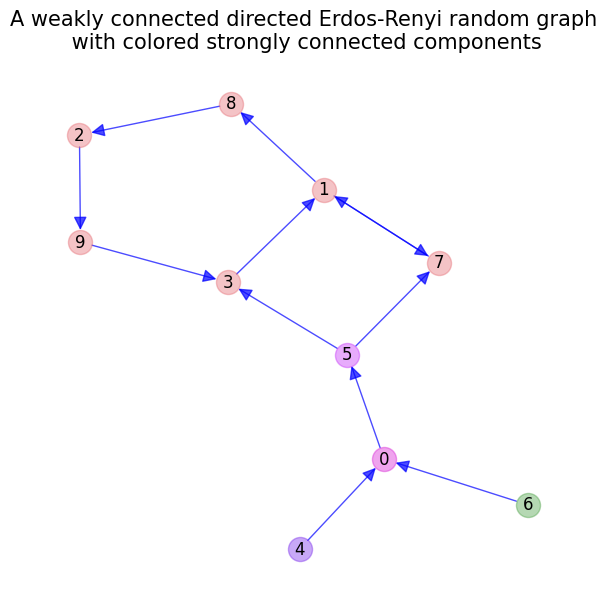

In [68]:
if nx.is_strongly_connected(G)==True:
    print("This %s is a strongly connected graph" %name)
else:
    print("This %s is a strongly disconnected graph and it has %i strongly connected components" %(name.replace("A ",""),nx.number_strongly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.strongly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]    
    
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+"\n"+" with colored strongly connected components",fontsize=15);

This weakly disconnected directed Erdos-Renyi random graph is a weakly disconnected graph and it has 5 weakly connected components
Component 1 with 3 nodes: [3, 5, 7]
Component 2 with 3 nodes: [0, 9, 8]
Component 3 with 2 nodes: [2, 10]
Component 4 with 2 nodes: [1, 6]
Component 5 with 1 nodes: [4]
The largest weakly connected component of this graph has 2 nodes and 2 edges


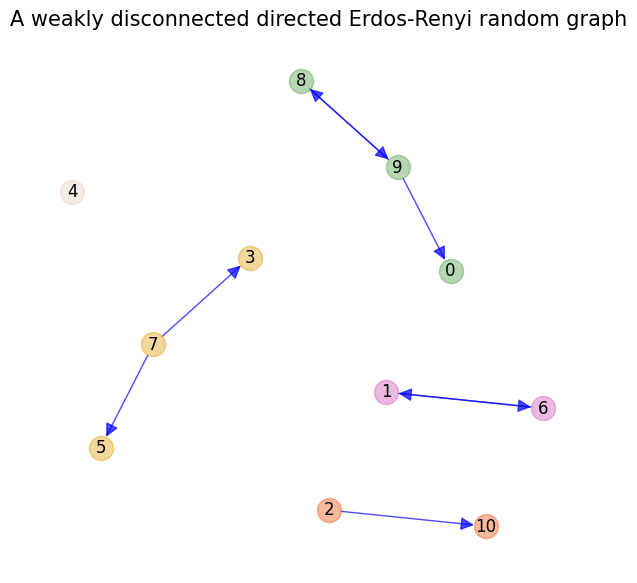

In [69]:
nodes=random.randint(10,21)
p=random.uniform(0.05,0.08)
name="A weakly disconnected directed Erdos-Renyi random graph"

while True:
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==False and nx.number_weakly_connected_components(G)>3 and len(list(nx.isolates(G)))<3:
#         if nx.is_strongly_connected(G)==False and len(list(nx.isolates(G)))<3 and nx.number_strongly_connected_components(G)>4 and nx.number_strongly_connected_components(G)<7:
        break

if nx.is_weakly_connected(G)==True:
    print("This %s is a weakly connected graph" %name.replace("A ",""))
else:
    print("This %s is a weakly disconnected graph and it has %i weakly connected components" %(name.replace("A ",""),nx.number_weakly_connected_components(G)))   
    sen=[]
    lc=sorted([list(y) for y in list(nx.weakly_connected_components(G))], key=lambda l: (len(l), l), reverse=True)
    for i,c in enumerate(lc):
        print("Component %i with %i nodes: %s" %(i+1,len(c),c))
        sg=G.subgraph(c)
        se=sg.nodes()
        sen.append(list(se))
    giant = max(nx.strongly_connected_components(G), key=len)
    Glcc=G.subgraph(giant)
    print("The largest weakly connected component of this graph has %i nodes and %i edges" %(len(Glcc.nodes()),len(Glcc.edges())))

number_of_colors = nx.number_strongly_connected_components(G)
hexadecimal_alphabets = '0123456789ABCDEF'
colorlist = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(number_of_colors)]                
            
plt.figure(figsize=(7,7))
pos=graphviz_layout(G)
for k in range(len(sen)):
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=sen[k],node_color=colorlist[k], alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);